In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler, PowerTransformer, OneHotEncoder,FunctionTransformer,StandardScaler,PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
%matplotlib inline
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.linear_model import Ridge,Lasso,SGDRegressor,ElasticNet,LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score

# Data Pre-processing

In [2]:
data = pd.read_csv(r"E:\dataScience\PSX prediction project\final_dataframe.csv")
data.head()

,Date,Open,High,Low,Close,Volume,Sector,Company
0,2001-01-15,19.5,19.50,19.50,19.50,0.0,Agriculture,Good Luck Industries Ltd
1,2001-05-15,19.5,27.00,27.00,27.00,500.0,Agriculture,Good Luck Industries Ltd
2,2001-05-24,27.0,27.00,27.00,27.00,0.0,Agriculture,Good Luck Industries Ltd
3,2001-12-15,25.0,25.00,25.00,25.00,0.0,Agriculture,Good Luck Industries Ltd
4,2002-04-12,25.0,26.85,26.85,26.85,0.0,Agriculture,Good Luck Industries Ltd


In [3]:
data.shape

(1625138, 8)

In [4]:
data.tail()

,Date,Open,High,Low,Close,Volume,Sector,Company
1625133,2021-11-15,11.80,11.89,11.11,11.26,2083500.0,Yarn & Fabrics & fibers,Service Fabrics Limited
1625134,2021-11-16,11.50,12.20,11.48,12.06,9581500.0,Yarn & Fabrics & fibers,Service Fabrics Limited
1625135,2021-11-17,12.25,12.79,11.80,11.94,18935000.0,Yarn & Fabrics & fibers,Service Fabrics Limited
1625136,2021-11-18,12.48,12.94,12.15,12.87,17734000.0,Yarn & Fabrics & fibers,Service Fabrics Limited
1625137,2021-11-19,13.06,13.44,12.70,12.93,17868000.0,Yarn & Fabrics & fibers,Service Fabrics Limited


In [5]:
data.isnull().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
Sector     0
Company    0
dtype: int64

In [6]:
data.describe()

,Open,High,Low,Close,Volume
count,1.625138e+06,1.625138e+06,1.625138e+06,1.625138e+06,1.625138e+06
mean,1.031578e+02,1.066221e+02,1.037452e+02,1.107062e+02,6.892712e+05
std,4.783924e+02,4.938563e+02,4.846742e+02,5.099828e+02,3.938853e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.750000e+00,6.100000e+00,5.800000e+00,6.850000e+00,1.200000e+03
50%,1.899000e+01,1.975000e+01,1.900000e+01,2.100000e+01,1.150000e+04
75%,6.851000e+01,7.030000e+01,6.850000e+01,7.222000e+01,1.400000e+05
max,2.600000e+04,2.600000e+04,2.600000e+04,2.600000e+04,9.502730e+08


In [7]:
data.shape

(1625138, 8)

In [8]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Sector', 'Company'], dtype='object')

In [9]:
data.nunique()

Date        10787
Open        50957
High        48037
Low         45063
Close       74520
Volume     165313
Sector         74
Company       613
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1625138 entries, 0 to 1625137
Data columns (total 8 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   Date     1625138 non-null  object 
 1   Open     1625138 non-null  float64
 2   High     1625138 non-null  float64
 3   Low      1625138 non-null  float64
 4   Close    1625138 non-null  float64
 5   Volume   1625138 non-null  float64
 6   Sector   1625138 non-null  object 
 7   Company  1625138 non-null  object 
dtypes: float64(5), object(3)
memory usage: 99.2+ MB


In [11]:
data['Date'].nunique

<bound method IndexOpsMixin.nunique of 0          2001-01-15
1          2001-05-15
2          2001-05-24
3          2001-12-15
4          2002-04-12
              ...    
1625133    2021-11-15
1625134    2021-11-16
1625135    2021-11-17
1625136    2021-11-18
1625137    2021-11-19
Name: Date, Length: 1625138, dtype: object>

In [12]:
data.shape

(1625138, 8)

In [13]:
data.dtypes

Date        object
Open       float64
High       float64
Low        float64
Close      float64
Volume     float64
Sector      object
Company     object
dtype: object

In [4]:
data[data.duplicated()]

,Date,Open,High,Low,Close,Volume,Sector,Company
2259,2008-07-01,5.00,5.09,4.95,4.95,38500.0,Airline,Pakistan International Airlines Corp
17904,2008-07-01,154.88,155.00,155.00,155.00,100.0,Automobile,Atlas Battery Limited
34536,7/1/2008,6.91,6.90,6.85,6.90,14000.0,Automobile,Dewan Farooque Motors Limited
39619,2008-07-01,23.95,23.75,23.75,23.75,4500.0,Automobile,Ghandhara Nissan Limited
44178,2008-07-01,14.46,14.46,14.46,14.46,500.0,Automobile,Ghani Automobile Industries Limited
...,...,...,...,...,...,...,...,...
1538182,2008-07-01,50.71,50.21,50.21,50.21,500.0,Tub Products,D.S. Industries Limited
1578125,2008-07-01,12.64,13.20,13.20,13.20,1000.0,Weaving&Spinning,Reliance Weaving Mills Limited
1596980,2008-07-01,6.60,6.54,6.54,6.54,2000.0,Yarn & Fabrics & fibers,Chenab Limited
1603587,2008-07-01,4.95,4.91,4.91,4.91,101500.0,Yarn & Fabrics & fibers,Dewan Salman Fibre Limited


In [3]:
#Removing Duplicated values
data.drop_duplicates(keep='first',inplace=True)
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
Index: 1624955 entries, 0 to 1625137
Data columns (total 8 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   Date     1624955 non-null  object 
 1   Open     1624955 non-null  float64
 2   High     1624955 non-null  float64
 3   Low      1624955 non-null  float64
 4   Close    1624955 non-null  float64
 5   Volume   1624955 non-null  float64
 6   Sector   1624955 non-null  object 
 7   Company  1624955 non-null  object 
dtypes: float64(5), object(3)
memory usage: 111.6+ MB


(1624955, 8)

In [16]:
data.shape

(1624955, 8)

# Conclusion
The dataset we have taken is about 1625138 rows.There are 8 columns.We cleaned up the null values and extra column.

# Exploratory Data Analysis (EDA)
★ Univariate Analysis

In [17]:
data.head()

,Date,Open,High,Low,Close,Volume,Sector,Company
0,2001-01-15,19.5,19.50,19.50,19.50,0.0,Agriculture,Good Luck Industries Ltd
1,2001-05-15,19.5,27.00,27.00,27.00,500.0,Agriculture,Good Luck Industries Ltd
2,2001-05-24,27.0,27.00,27.00,27.00,0.0,Agriculture,Good Luck Industries Ltd
3,2001-12-15,25.0,25.00,25.00,25.00,0.0,Agriculture,Good Luck Industries Ltd
4,2002-04-12,25.0,26.85,26.85,26.85,0.0,Agriculture,Good Luck Industries Ltd


# 1. Date

In [18]:
data['Date'].dtype

dtype('O')

In [4]:
from dateutil.parser import parse
def parse_dates(str_date):
    try:
        parsed_dates=parse(str_date,dayfirst=True)
        return parsed_dates.strftime('%Y-%m-%d')
        return parse_dates
    except(ValueError):
        return None
    
data['Standardized_Date'] = data['Date'].apply(parse_dates)

In [5]:
data['Date']= pd.to_datetime(data['Standardized_Date'])

In [21]:
failed_conversion = data['Date'].isna().sum()
print(f"Number of failed date conversions: {failed_conversion}")

Number of failed date conversions: 0


In [22]:
rows_with_nan_dates = data[data['Date'].isna()]
print("Rows with NaN dates:")
print(rows_with_nan_dates)

Rows with NaN dates:
Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume, Sector, Company, Standardized_Date]
Index: []


In [5]:
data.drop(columns=['Standardized_Date'], inplace=True)

In [24]:
unique_years = np.sort(data['Date'].dt.year.unique())
print(f'we have data of these years {unique_years}')

we have data of these years [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2021 2022]


In [25]:
data['Year'] = data['Date'].dt.year

In [26]:
data['month'] = data['Date'].dt.month_name()


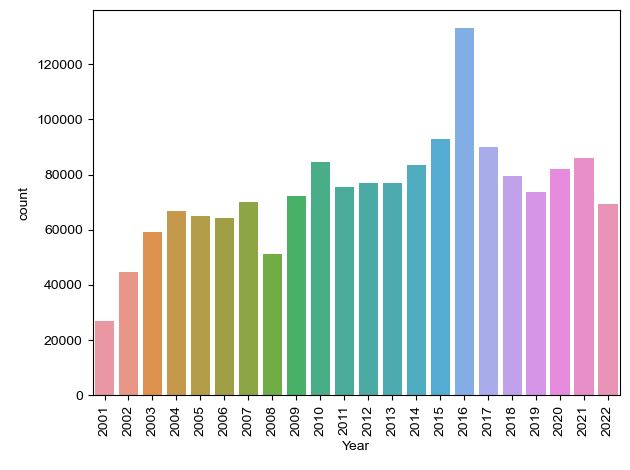

In [27]:
sns.countplot(x='Year', data=data)
plt.xticks(rotation=90)
plt.tight_layout()
sns.set_style('darkgrid')
plt.show()

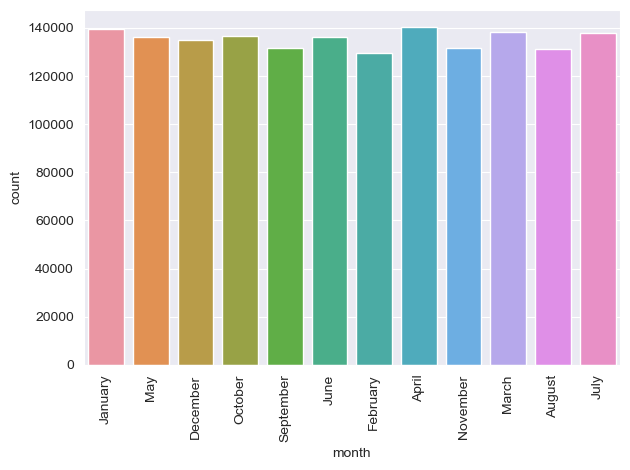

In [28]:
sns.countplot(x='month', data=data)
plt.xticks(rotation=90)
plt.tight_layout()
sns.set_style('darkgrid')
plt.show()

In [29]:
print(data['Date'].min())

print(data['Date'].max())

2001-01-01 00:00:00
2022-12-10 00:00:00


# Conclusion

# 2. Open

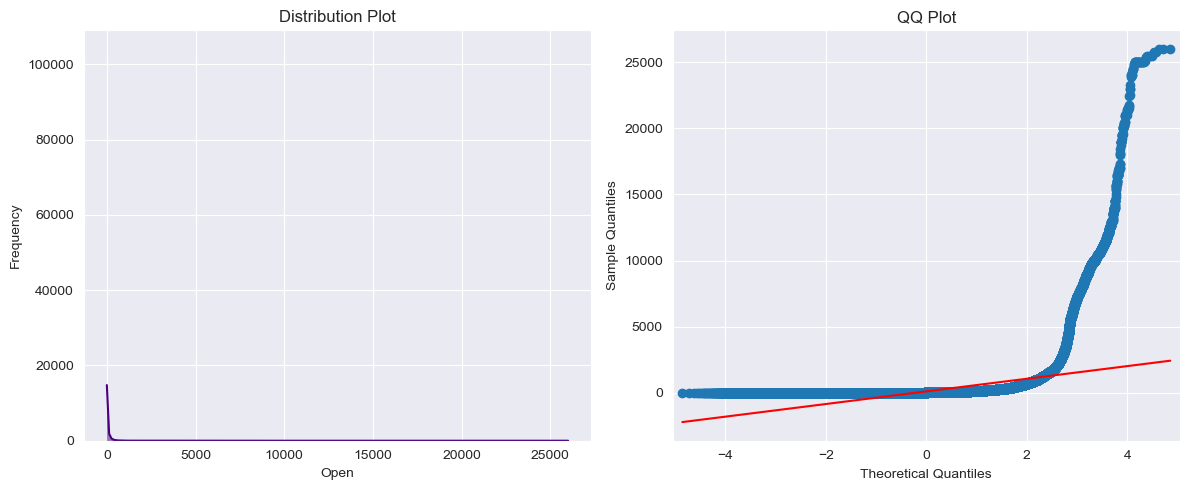

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Subplot 1: Distribution plot
sns.histplot(data['Open'], kde=True, color='indigo', ax=axes[0])
axes[0].set_title('Distribution Plot')
axes[0].set_xlabel('Open')
axes[0].set_ylabel('Frequency') 

# Subplot 2: QQ plot
sm.qqplot(data['Open'], line='s', ax=axes[1])
axes[1].set_title('QQ Plot')
axes[1].set_xlabel('Theoretical Quantiles')
axes[1].set_ylabel('Sample Quantiles') 
plt.tight_layout()
plt.show()

In [9]:
# Data selection where 'Open' is between 0 and 100
Open_from_1_to_100 = data[(data['Open'] >= 0) & (data['Open'] <= 100)]
open_percentage_1_to_100 = (Open_from_1_to_100.shape[0] / data.shape[0]) * 100

# Data selection where 'Open' is between 100 and 3000
Open_from_100_to_3000 = data[(data['Open'] >= 100) & (data['Open'] <= 3000)]
open_percentage_100_to_3000 = (Open_from_100_to_3000.shape[0] / data.shape[0]) * 100

# Display the results
print(f"Percentage of data with 'Open' from 1 to 100: {open_percentage_1_to_100}%")
print(f"Percentage of data with 'Open' from 100 to 3000: {open_percentage_100_to_3000}%")

Percentage of data with 'Open' from 1 to 100: 81.26951207879603%
Percentage of data with 'Open' from 100 to 3000: 18.482727213984386%


In [32]:
print('Companies having thier index open in range of 1-100 are :' ,Open_from_1_to_100['Company'].nunique())

print('Companies having thier index open in range above 100 is :' ,Open_from_100_to_3000['Company'].nunique())

Companies having thier index open in range of 1-100 are : 613
Companies having thier index open in range above 100 is : 223


In [33]:
data['Open'].skew()

19.117737283208303

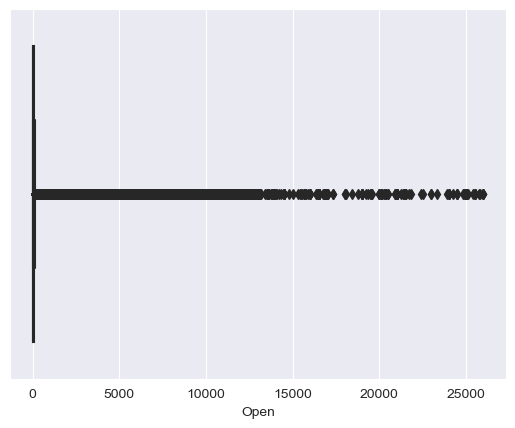

In [34]:
sns.boxplot( x='Open', data=data, color='indigo')
plt.show()

In [58]:
Q1 = data['Open'].quantile(0.25)
Q3 = data['Open'].quantile(0.75)
IQR = Q3 - Q1
Open_upper_limit = Q3 + 1.5 * IQR
Open_lower_limit = Q1 - 1.5 * IQR
Open_outliers = data[(data['Open'] > Open_upper_limit) | (data['Open'] <Open_lower_limit)]
print(f'Upper Limit: {Open_upper_limit}')
print(f'Lower Limit: {Open_lower_limit}')
print(f'Number of Outliers: {len(Open_outliers)}')

Upper Limit: 162.65000000000003
Lower Limit: -88.39000000000001
Number of Outliers: 204107


In [36]:
Open_outliers

,Date,Open,High,Low,Close,Volume,Sector,Company,Year,month
51,2005-04-18,174.15,186.00,186.0,186.00,0.0,Agriculture,Good Luck Industries Ltd,2005,April
52,2005-04-19,186.00,188.00,188.0,188.00,0.0,Agriculture,Good Luck Industries Ltd,2005,April
53,2005-04-27,188.00,191.00,191.0,191.00,0.0,Agriculture,Good Luck Industries Ltd,2005,April
54,2005-02-05,191.00,192.00,192.0,192.00,0.0,Agriculture,Good Luck Industries Ltd,2005,February
55,2005-05-23,192.00,198.00,198.0,198.00,0.0,Agriculture,Good Luck Industries Ltd,2005,May
...,...,...,...,...,...,...,...,...,...,...
1622540,2022-11-11,1157.00,1157.00,1157.0,1250.00,20.0,Yarn & Fabrics & fibers,Sapphire Fibres Limited,2022,November
1622542,2022-11-15,1160.00,1250.00,1160.0,1160.00,2540.0,Yarn & Fabrics & fibers,Sapphire Fibres Limited,2022,November
1622543,2022-11-16,1073.10,1073.10,1073.0,1073.00,380.0,Yarn & Fabrics & fibers,Sapphire Fibres Limited,2022,November
1622544,2022-11-17,994.00,1153.47,994.0,1153.31,160.0,Yarn & Fabrics & fibers,Sapphire Fibres Limited,2022,November


In [37]:
data['Open'].min()
data['Open'].max()

26000.0

# Conclusion

# 3. High

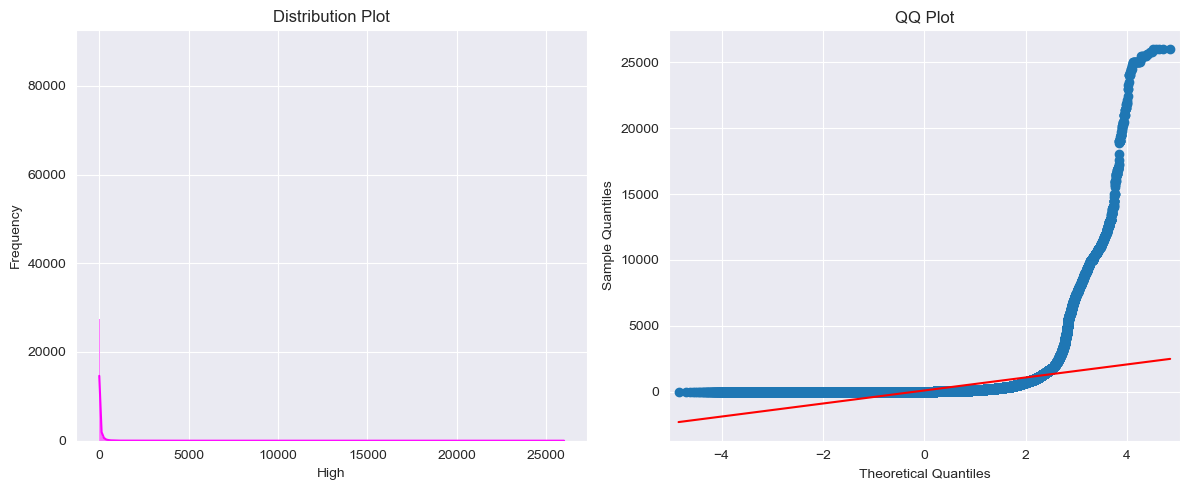

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Subplot 1: Distribution plot
sns.histplot(data['High'], kde=True,color='magenta', ax=axes[0])
axes[0].set_title('Distribution Plot')
axes[0].set_xlabel('High')
axes[0].set_ylabel('Frequency')

# Subplot 2: QQ plot
sm.qqplot(data['High'], line='s', ax=axes[1])
axes[1].set_title('QQ Plot')
axes[1].set_xlabel('Theoretical Quantiles')
axes[1].set_ylabel('Sample Quantiles')
plt.tight_layout()
plt.show()

In [39]:
data['High'].skew()

18.818670560804094

In [11]:
# Data selection where 'High' is between 0 and 100
High_from_1_to_100 = data[(data['High'] >= 0) & (data['High'] <= 100)]
high_percentage_1_to_100 = (High_from_1_to_100.shape[0] / data.shape[0]) * 100

# Data selection where 'High' is between 100 and 3000
High_from_100_to_3000 = data[(data['High'] >= 100) & (data['High'] <= 3000)]
high_percentage_100_to_3000 = (High_from_100_to_3000.shape[0] / data.shape[0]) * 100

# Display the results
print(f"Percentage of data with 'High' from 1 to 100: {high_percentage_1_to_100}%")
print(f"Percentage of data with 'High' from 100 to 3000: {high_percentage_100_to_3000}%")

Percentage of data with 'High' from 1 to 100: 80.86894714007464%
Percentage of data with 'High' from 100 to 3000: 18.869814856411406%


In [41]:
print('Companies having thier index high in range of 1-100 are :' ,High_from_1_to_100['Company'].nunique())

print('Companies having thier index high in range above 100 is :' ,High_from_100_to_3000['Company'].nunique())

Companies having thier index high in range of 1-100 are : 611
Companies having thier index high in range above 100 is : 226


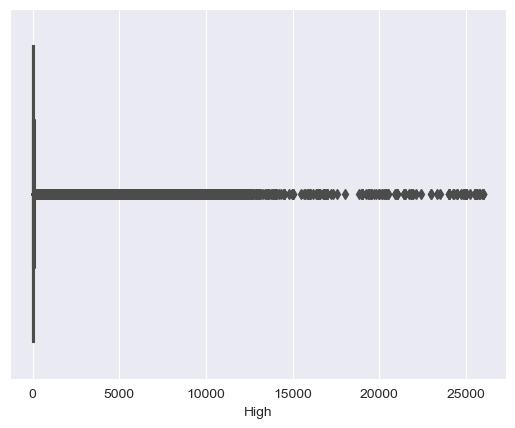

In [42]:
sns.boxplot( x='High', data=data , color='magenta')
plt.show()

In [59]:
Q1 = data['High'].quantile(0.25)
Q3 = data['High'].quantile(0.75)
IQR = Q3 - Q1

High_upper_limit = Q3 + 1.5 * IQR
High_lower_limit = Q1 - 1.5 * IQR  

High_outliers = data[(data['High'] > High_upper_limit) | (data['High'] < High_lower_limit)]

print(f'Upper Limit: {High_upper_limit}')  
print(f'Lower Limit: {High_lower_limit}')  
print(f'Number of Outliers: {len(High_outliers)}')

Upper Limit: 166.60000000000002
Lower Limit: -90.20000000000002
Number of Outliers: 204547


In [44]:
print(data['High'].min())
data['High'].max()

0.0


26000.0

# Conclusion

# 4. Low

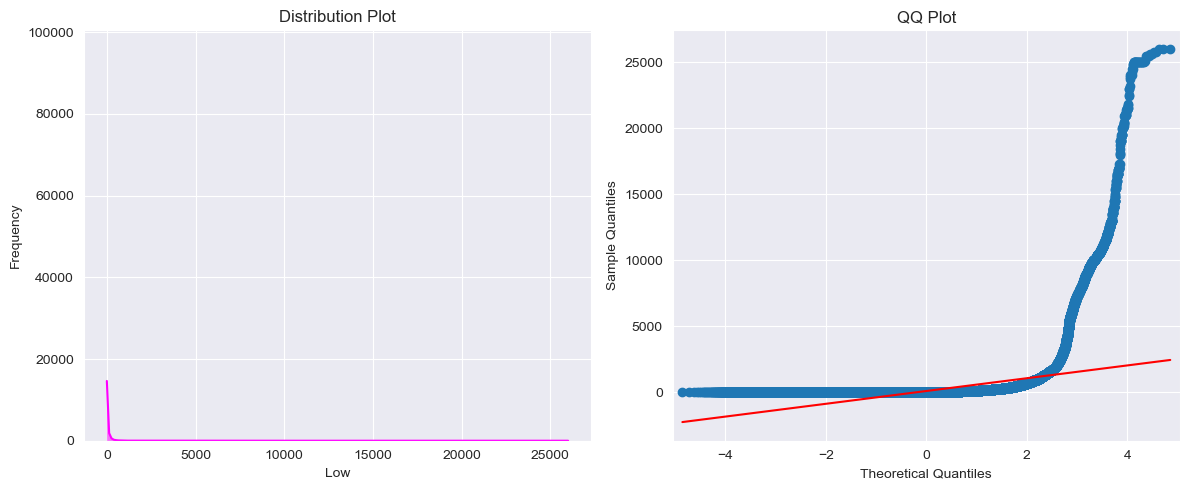

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Subplot 1: Distribution plot
sns.histplot(data['Low'], kde=True,color='magenta', ax=axes[0])
axes[0].set_title('Distribution Plot')
axes[0].set_xlabel('Low')
axes[0].set_ylabel('Frequency')

# Subplot 2: QQ plot
sm.qqplot(data['Low'], line='s', ax=axes[1])
axes[1].set_title('QQ Plot')
axes[1].set_xlabel('Theoretical Quantiles')
axes[1].set_ylabel('Sample Quantiles')
plt.tight_layout()
plt.show()

In [46]:
data['Low'].skew()

18.999548321751558

In [13]:
# Data selection where 'Low' is between 0 and 100
Low_from_1_to_100 = data[(data['Low'] >= 0) & (data['Low'] <= 100)]
low_percentage_1_to_100 = (Low_from_1_to_100.shape[0] / data.shape[0]) * 100

# Data selection where 'Low' is between 100 and 3000
Low_from_100_to_3000 = data[(data['Low'] >= 100) & (data['Low'] <= 3000)]
low_percentage_100_to_3000 = (Low_from_100_to_3000.shape[0] / data.shape[0]) * 100

# Display the results
print(f"Percentage of data with 'Low' from 1 to 100: {low_percentage_1_to_100}%")
print(f"Percentage of data with 'Low' from 100 to 3000: {low_percentage_100_to_3000}%")

Percentage of data with 'Low' from 1 to 100: 81.29677437221339%
Percentage of data with 'Low' from 100 to 3000: 18.461680477305524%


In [48]:
print('Companies having thier index low in range of 1-100 are :' ,Low_from_1_to_100['Company'].nunique())

print('Companies having thier index low in range above 100 is :' ,Low_from_1_to_100['Company'].nunique())

Companies having thier index low in range of 1-100 are : 612
Companies having thier index low in range above 100 is : 612


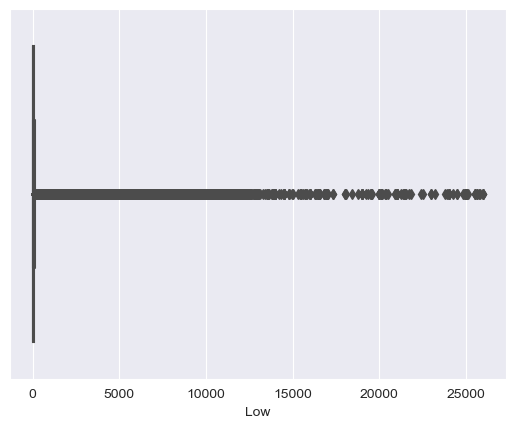

In [49]:
sns.boxplot( x='Low', data=data , color='magenta')
plt.show()

In [60]:
Q1 = data['Low'].quantile(0.25)
Q3 = data['Low'].quantile(0.75)
IQR = Q3 - Q1

Low_upper_limit = Q3 + 1.5 * IQR
Low_lower_limit = Q1 - 1.5 * IQR  

Low_outliers = data[(data['Low'] > Low_upper_limit) | (data['Low'] < Low_lower_limit)]

print(f'Upper Limit: {Low_upper_limit}')  
print(f'Lower Limit: {Low_lower_limit}')  
print(f'Number of Outliers: {len(Low_outliers)}')

Upper Limit: 162.55
Lower Limit: -88.25000000000001
Number of Outliers: 203454


In [51]:
print(data['Low'].min())
data['Low'].max()

0.0


26000.0

# Conclusion

# 5. Close

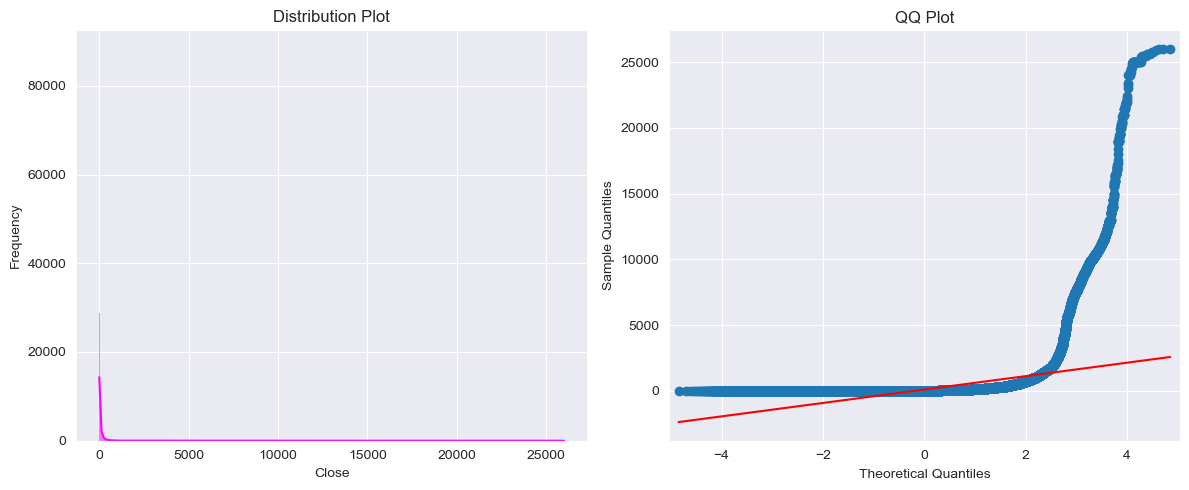

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Subplot 1: Distribution plot
sns.histplot(data['Close'], kde=True,color='magenta', ax=axes[0])
axes[0].set_title('Distribution Plot')
axes[0].set_xlabel('Close')
axes[0].set_ylabel('Frequency')

# Subplot 2: QQ plot
sm.qqplot(data['Close'], line='s', ax=axes[1])
axes[1].set_title('QQ Plot')
axes[1].set_xlabel('Theoretical Quantiles')
axes[1].set_ylabel('Sample Quantiles')
plt.tight_layout()
plt.show()

In [53]:
# Data selection where 'Close' is between 0 and 100
Close_from_1_to_100 = data[(data['Close'] >= 0) & (data['Close'] <= 100)]
close_percentage_1_to_100 = (Close_from_1_to_100.shape[0] / data.shape[0]) * 100

# Data selection where 'Close' is between 100 and 3000
Close_from_100_to_3000 = data[(data['Close'] >= 100) & (data['Close'] <= 3000)]
close_percentage_100_to_3000 = (Close_from_100_to_3000.shape[0] / data.shape[0]) * 100

# Display the results
print(f"Percentage of data with 'Close' from 1 to 100: {close_percentage_1_to_100}%")
print(f"Percentage of data with 'Close' from 100 to 3000: {close_percentage_100_to_3000}%")


Percentage of data with 'Close' from 1 to 100: 80.4093036422547%
Percentage of data with 'Close' from 100 to 3000: 19.28902646534827%


In [54]:
print('Companies having thier index close in range of 1-100 are :' ,Close_from_1_to_100['Company'].nunique())

print('Companies having thier index close in range above 100 is :' ,Close_from_1_to_100['Company'].nunique())

Companies having thier index close in range of 1-100 are : 605
Companies having thier index close in range above 100 is : 605


In [55]:
data['Close'].skew()

18.14833340814692

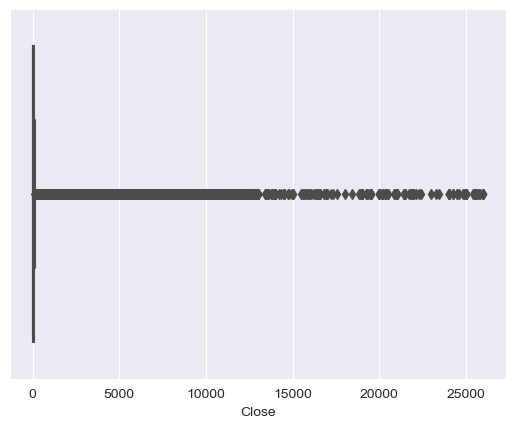

In [56]:
sns.boxplot( x='Close', data=data , color='magenta')
plt.show()

In [61]:
Q1 = data['Close'].quantile(0.25)
Q3 = data['Close'].quantile(0.75)
IQR = Q3 - Q1

Close_upper_limit = Q3 + 1.5 * IQR
Close_lower_limit = Q1 - 1.5 * IQR  

Close_outliers = data[(data['Close'] > Close_upper_limit) | (data['Close'] < Close_lower_limit)]

print(f'Upper Limit: {Close_upper_limit}')  
print(f'Lower Limit: {Close_lower_limit}')  
print(f'Number of Outliers: {len(Close_outliers)}')

Upper Limit: 170.26250000000002
Lower Limit: -91.19750000000002
Number of Outliers: 204263


In [58]:
print(data['Close'].min())
data['Close'].max()

0.0


26000.0

# Conclusion

# 6. Volume

#### In the context of stock price data, "volume" refers to the number of shares or contracts traded in a security or market during a given period of time

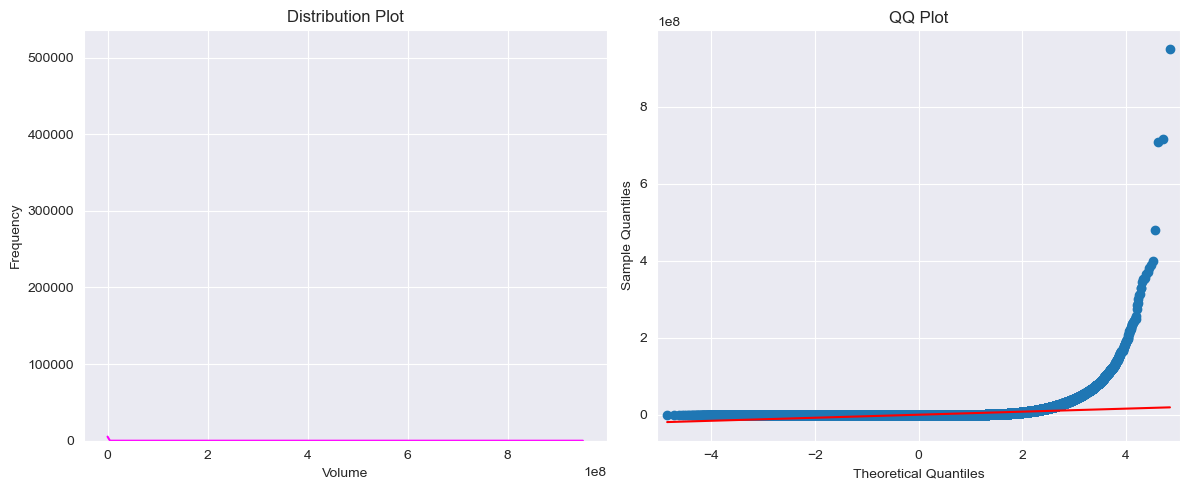

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Subplot 1: Distribution plot
sns.histplot(data['Volume'], kde=True,color='magenta', ax=axes[0])
axes[0].set_title('Distribution Plot')
axes[0].set_xlabel('Volume')
axes[0].set_ylabel('Frequency')

# Subplot 2: QQ plot
sm.qqplot(data['Volume'], line='s', ax=axes[1])
axes[1].set_title('QQ Plot')
axes[1].set_xlabel('Theoretical Quantiles')
axes[1].set_ylabel('Sample Quantiles')
plt.tight_layout()
plt.show()

In [60]:
data['Volume'].min()

0.0

In [61]:
data['Volume'].max()

950273000.0

In [62]:
data[data['Volume']>100]

,Date,Open,High,Low,Close,Volume,Sector,Company,Year,month
1,2001-05-15,19.50,27.00,27.00,27.00,500.0,Agriculture,Good Luck Industries Ltd,2001,May
18,2003-05-27,51.15,54.95,54.95,54.95,30000.0,Agriculture,Good Luck Industries Ltd,2003,May
36,2004-06-15,112.00,120.40,120.40,120.40,30000.0,Agriculture,Good Luck Industries Ltd,2004,June
59,2005-08-11,218.00,228.90,220.00,228.90,200.0,Agriculture,Good Luck Industries Ltd,2005,August
63,2006-05-26,240.35,252.35,240.35,252.35,600.0,Agriculture,Good Luck Industries Ltd,2006,May
...,...,...,...,...,...,...,...,...,...,...
1625133,2021-11-15,11.80,11.89,11.11,11.26,2083500.0,Yarn & Fabrics & fibers,Service Fabrics Limited,2021,November
1625134,2021-11-16,11.50,12.20,11.48,12.06,9581500.0,Yarn & Fabrics & fibers,Service Fabrics Limited,2021,November
1625135,2021-11-17,12.25,12.79,11.80,11.94,18935000.0,Yarn & Fabrics & fibers,Service Fabrics Limited,2021,November
1625136,2021-11-18,12.48,12.94,12.15,12.87,17734000.0,Yarn & Fabrics & fibers,Service Fabrics Limited,2021,November


In [63]:
data['Volume'].skew()

37.89952182054515

In [64]:
# Data selection where 'Volume' is between 0 and 100
Volume_from_1_to_100 = data[(data['Volume'] >= 0) & (data['Volume'] <= 100)]
volume_percentage_1_to_100 = (Volume_from_1_to_100.shape[0] / data.shape[0]) * 100

# Data selection where 'Volume' is between 100 and 3000
Volume_from_100_to_3000 = data[(data['Volume'] >= 100) & (data['Volume'] <= 3000000000)]
volume_percentage_100_to_3000 = (Volume_from_100_to_3000.shape[0] / data.shape[0]) * 100

# Display the results
print(f"Percentage of data with 'Volume' from 1 to 100: {volume_percentage_1_to_100}%")
print(f"Percentage of data with 'Volume' from 100 to 30000000: {volume_percentage_100_to_3000}%")


Percentage of data with 'Volume' from 1 to 100: 10.610816914929952%
Percentage of data with 'Volume' from 100 to 30000000: 90.61660169050835%


In [65]:
data[data['Volume']==0]

,Date,Open,High,Low,Close,Volume,Sector,Company,Year,month
0,2001-01-15,19.50,19.50,19.50,19.50,0.0,Agriculture,Good Luck Industries Ltd,2001,January
2,2001-05-24,27.00,27.00,27.00,27.00,0.0,Agriculture,Good Luck Industries Ltd,2001,May
3,2001-12-15,25.00,25.00,25.00,25.00,0.0,Agriculture,Good Luck Industries Ltd,2001,December
4,2002-12-04,25.00,26.85,26.85,26.85,0.0,Agriculture,Good Luck Industries Ltd,2002,December
5,2002-05-20,26.85,28.00,28.00,28.00,0.0,Agriculture,Good Luck Industries Ltd,2002,May
...,...,...,...,...,...,...,...,...,...,...
1623817,2016-05-13,0.00,0.00,0.00,18.91,0.0,Yarn & Fabrics & fibers,Service Fabrics Limited,2016,May
1623818,2016-05-16,0.00,0.00,0.00,18.91,0.0,Yarn & Fabrics & fibers,Service Fabrics Limited,2016,May
1623819,2016-05-17,0.00,0.00,0.00,18.91,0.0,Yarn & Fabrics & fibers,Service Fabrics Limited,2016,May
1623820,2016-05-18,0.00,0.00,0.00,18.91,0.0,Yarn & Fabrics & fibers,Service Fabrics Limited,2016,May


In [66]:
data[(data['Volume'] >= 100) & (data['Volume'] <= 300000)]

,Date,Open,High,Low,Close,Volume,Sector,Company,Year,month
1,2001-05-15,19.50,27.00,27.00,27.00,500.0,Agriculture,Good Luck Industries Ltd,2001,May
18,2003-05-27,51.15,54.95,54.95,54.95,30000.0,Agriculture,Good Luck Industries Ltd,2003,May
36,2004-06-15,112.00,120.40,120.40,120.40,30000.0,Agriculture,Good Luck Industries Ltd,2004,June
59,2005-08-11,218.00,228.90,220.00,228.90,200.0,Agriculture,Good Luck Industries Ltd,2005,August
60,2005-12-19,228.90,228.90,228.90,228.90,100.0,Agriculture,Good Luck Industries Ltd,2005,December
...,...,...,...,...,...,...,...,...,...,...
1625103,2021-01-10,13.80,14.38,13.80,14.09,211000.0,Yarn & Fabrics & fibers,Service Fabrics Limited,2021,January
1625107,2021-07-10,16.24,16.64,15.90,16.02,205000.0,Yarn & Fabrics & fibers,Service Fabrics Limited,2021,July
1625108,2021-08-10,16.69,16.69,15.00,15.11,256500.0,Yarn & Fabrics & fibers,Service Fabrics Limited,2021,August
1625110,2021-12-10,12.94,12.94,12.94,12.94,80000.0,Yarn & Fabrics & fibers,Service Fabrics Limited,2021,December


In [67]:
data.shape

(1624955, 10)

In [68]:
data[data['Volume']<0]

,Date,Open,High,Low,Close,Volume,Sector,Company,Year,month


In [62]:
Q1 = data['Volume'].quantile(0.25)
Q3 = data['Volume'].quantile(0.75)
IQR = Q3 - Q1

Volume_upper_limit = Q3 + 1.5 * IQR
Volume_lower_limit = Q1 - 1.5 * IQR  

Volume_outliers = data[(data['Volume'] > Volume_upper_limit) | (data['Volume'] <Volume_lower_limit)]

print(f'Upper Limit: {Volume_upper_limit}')  
print(f'Lower Limit: {Volume_lower_limit}')  
print(f'Number of Outliers: {len(Volume_outliers)}')

Upper Limit: 348200.0
Lower Limit: -207000.0
Number of Outliers: 289569


In [70]:
outliear_percentage =(Volume_outliers.shape[0]/data.shape[0])*100
outliear_percentage

17.820124249594606

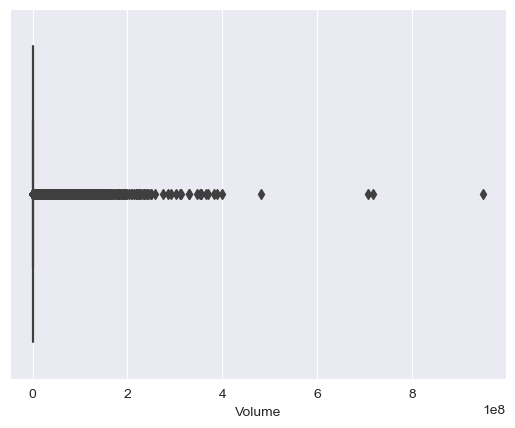

In [71]:
sns.boxplot(x='Volume',data=data)
plt.show()

In [72]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Sector', 'Company',
       'Year', 'month'],
      dtype='object')

In [73]:
Volume_Range = data['Volume'].max() - data['Volume'].min()
print(f'range of Volume is {Volume_Range}')

range of Volume is 950273000.0


# Conclusion

# 7. Sector

In [74]:
### changing it to category
data['Sector'] = data['Sector'].astype('category')

In [75]:
data['Sector'].dtype

CategoricalDtype(categories=['Agriculture', 'Airline', 'Aluminium Bevarage', 'Automobile',
                  'Bank', 'Brewery', 'Business & Investers', 'Cargo', 'Cement',
                  'Ceramics', 'Chemicals', 'Cigratte', 'Clothes',
                  'Construction', 'Consultancy Services', 'Containers',
                  'Cotton', 'Electrical Machinary', 'Energy',
                  'Engineering Products', 'Entertainment Channels',
                  'Explosive Products', 'Exports', 'Fertilizer', 'Foods',
                  'Fuels', 'Funds', 'Gelatin', 'Ghee Industries', 'Glass',
                  'Home Appliances', 'Hotel Buisness', 'Imports', 'Insurance',
                  'Jute Products', 'Labs', 'Leather', 'Meat', 'Medical Gasses',
                  'Mills', 'Mobile Phone Accessories', 'Modaraba', 'Newspaper',
                  'Oil', 'PVC_s', 'Packing Material', 'Paints',
                  'Paper Products', 'Personal Care', 'Petroleum',
                  'Pharma,Health,Hospital',

In [76]:
data['Sector'].value_counts()

Sector
Textile                     176547
Bank                        135454
Insurance                    87849
Cement                       84896
Sugar                        84527
                             ...  
Exports                        357
Ghee Industries                343
Aluminium Bevarage             331
Mobile Phone Accessories       284
Cargo                          202
Name: count, Length: 74, dtype: int64

In [77]:
data['Sector'].nunique()

74

In [78]:
data['Sector'].value_counts()[data['Sector'].value_counts()>1000]

Sector
Textile           176547
Bank              135454
Insurance          87849
Cement             84896
Sugar              84527
                   ...  
Gelatin             1691
Resins              1568
Stock Exchange      1367
Sports              1066
Medical Gasses      1062
Name: count, Length: 66, dtype: int64

In [79]:
data['Sector'].value_counts()[data['Sector'].value_counts()>10000]

Sector
Textile                    176547
Bank                       135454
Insurance                   87849
Cement                      84896
Sugar                       84527
Automobile                  78892
Modaraba                    71754
Chemicals                   71028
Weaving&Spinning            49919
Oil                         47997
Foods                       47564
Power Generation            45226
Mills                       43863
Business & Investers        41773
Pharma,Health,Hospital      39732
Fertilizer                  37488
Yarn & Fabrics & fibers     33568
Construction                31085
Telecom                     28470
Cotton                      24082
Security                    23461
Energy                      23235
Steel                       22170
Glass                       18454
Funds                       17513
Tech                        16989
Entertainment Channels      16066
Packing Material            15828
Labs                        14572
Electri

C:\Users\drstr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\drstr\AppData\Local\Temp\ipykernel_23620\2705228265.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


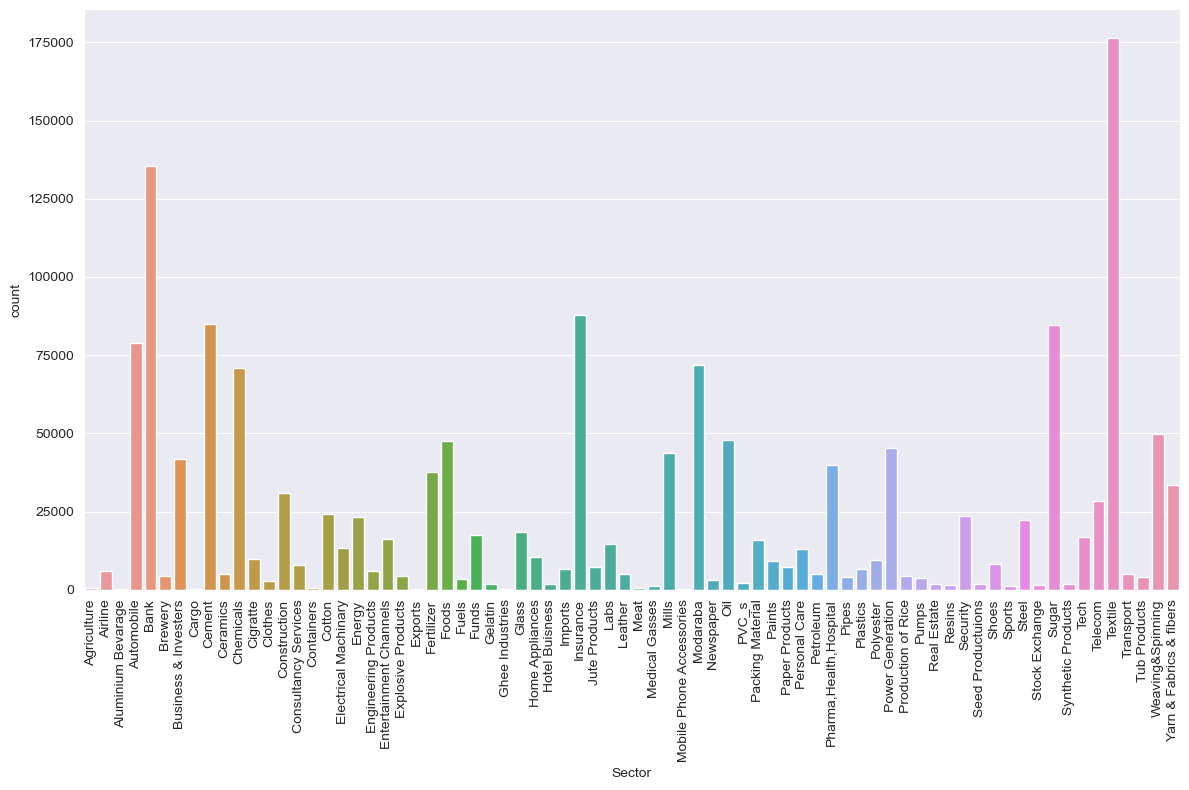

In [80]:
g = sns.catplot(x="Sector", data=data, kind="count", height=8, aspect=1.5)

# Rotate the x-axis labels for better readability
g.set_xticklabels(rotation=90)

# Adjust the layout to make sure everything fits without overlapping
plt.tight_layout()

# Show the plot
plt.show()

# Conclusion

# 8. Company

In [81]:
### changing it to category
data['Company'] = data['Company'].astype('category')

In [82]:
data['Company'].dtype

CategoricalDtype(categories=['(Colony) Sarhad Textile Mills Limited',
                  '786 Investments Limited', 'AEL Textile Limited',
                  'AGP Limited', 'AKD Capital Limited',
                  'AKD Hospitality Limited', 'AKD Securities Limited',
                  'AN Textile Mills Limited',
                  'Abbott Laboratories (Pakistan) Limited',
                  'Abdullah Shah Ghazi Sugar Mills Limited',
                  ...
                  'Waves Corporation Limited', 'Waves Home Appliances Limited',
                  'Worldcall Telecom Limited', 'Wyeth Pakistan Limited',
                  'Yousaf Weaving Mills Limited', 'ZIL Limited',
                  'Zahidjee Textile Mills Limited',
                  'Zahur Cotton Mills Limited',
                  'Zeal Pak Cement Factory Limited',
                  'Zephyr Textiles Limited'],
, ordered=False)

In [83]:
data['Company'].value_counts()

Company
K-Electric Limited                        5374
Telecard Limited                          5365
Pakistan State Oil Company Limited        5364
Pakistan Telecommunication Company Ltd    5364
Fauji Fertilizer Company Limited          5364
                                          ... 
East West (R)                                6
SG.Allied Businsses Limited                  2
Agro Allianz Limited                         2
ICC Industries Limited                       2
INL                                          1
Name: count, Length: 613, dtype: int64

In [84]:
len(data['Company'].value_counts()[data['Company'].value_counts()>5000])

45

In [85]:
data['Company'].value_counts()[data['Company'].value_counts()>5000]

Company
K-Electric Limited                        5374
Telecard Limited                          5365
Pakistan State Oil Company Limited        5364
Pakistan Telecommunication Company Ltd    5364
Fauji Fertilizer Company Limited          5364
Engro Corporation Limited                 5362
Askari Bank Limited                       5362
MCB Bank Limited                          5361
Nishat Mills Limited                      5361
The Bank of Punjab                        5356
The Hub Power Company Limited             5356
Pakistan International Airlines Corp      5354
D.G. Khan Cement Company Limited          5352
Lucky Cement Limited                      5351
Maple Leaf Cement Factory Limited         5351
Pakistan Oilfields Limited                5339
Bank AL Habib Limited                     5335
Faysal Bank Limited                       5332
Dewan Farooque Motors Limited             5331
Adamjee Insurance Company Limited         5324
Pioneer Cement Limited                    5305
Chera

In [86]:
data['Company'].value_counts()[data['Company'].value_counts()>1000]

Company
K-Electric Limited                        5374
Telecard Limited                          5365
Pakistan State Oil Company Limited        5364
Pakistan Telecommunication Company Ltd    5364
Fauji Fertilizer Company Limited          5364
                                          ... 
Pakistan Oxygen Limited                   1062
At-Tahur Limited                          1062
First Imrooz Modaraba                     1025
AEL Textile Limited                       1022
Pak-Gulf Leasing Company Limited          1013
Name: count, Length: 490, dtype: int64

In [87]:
data['Company'].value_counts()[data['Company'].value_counts()<1000]

Company
Glamour Textile Mills Limited    974
Adil Textile Mills Limited       965
EFG Hermes Pakistan Limited      959
SME Leasing Limited              951
Khairpur Sugar Mills Limited     941
                                ... 
East West (R)                      6
SG.Allied Businsses Limited        2
Agro Allianz Limited               2
ICC Industries Limited             2
INL                                1
Name: count, Length: 122, dtype: int64

In [88]:
data['Company'].nunique()

613

# Conclusion

# Bivariate Analysis

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

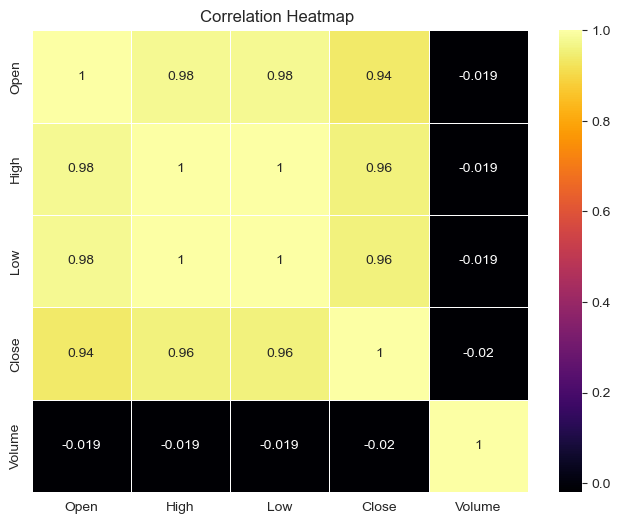

In [90]:
selected_columns = ['Open','High','Low','Close','Volume']
correlation_matrix = data[selected_columns].corr()
# Plotting Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', linewidths=.5)
plt.title('Correlation Heatmap ')
plt.show()

In [91]:
correlation_matrix

,Open,High,Low,Close,Volume
Open,1.000000,0.978356,0.978929,0.937818,-0.018640
High,0.978356,1.000000,0.998423,0.958798,-0.018814
Low,0.978929,0.998423,1.000000,0.957534,-0.018892
Close,0.937818,0.958798,0.957534,1.000000,-0.019958
Volume,-0.018640,-0.018814,-0.018892,-0.019958,1.000000


In [92]:
# Set the threshold for high correlation
threshold = 0.3

# Loop through the correlation matrix
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if np.abs(correlation_matrix.iloc[i, j]) > threshold:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j],correlation_matrix.iloc[i, j])
            high_corr_pairs.append(pair)

# Display pairs with high correlation
for pair in high_corr_pairs:
    print(f"High correlation between {pair[0]} and {pair[1]}: {pair[2]}")

High correlation between Open and High: 0.9783561226737014
High correlation between Open and Low: 0.9789289142769113
High correlation between Open and Close: 0.9378183440804377
High correlation between High and Low: 0.9984231177814822
High correlation between High and Close: 0.9587977075155975
High correlation between Low and Close: 0.957533522979448


### Open vs High:

#### open and high features are correlated 0.97 

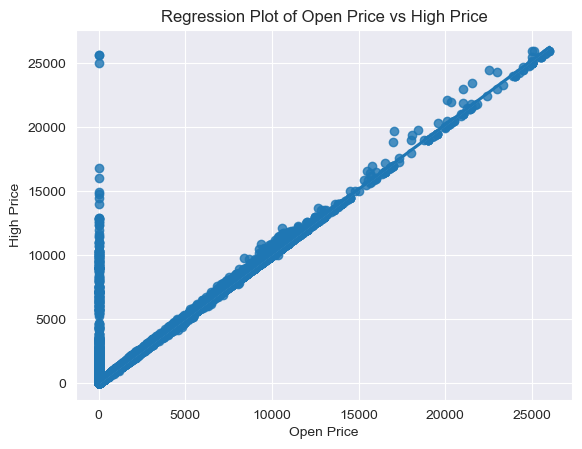

In [93]:
sns.regplot(x='Open',y='High',data=data)
plt.xlabel('Open Price')
plt.ylabel('High Price')
plt.title('Regression Plot of Open Price vs High Price')
plt.show()

In [94]:
data.shape

(1624955, 10)

In [95]:
pd.merge(Open_from_1_to_100,High_from_1_to_100,how='inner')

,Date,Open,High,Low,Close,Volume,Sector,Company,Year,month
0,2001-01-15,19.50,19.50,19.50,19.50,0.0,Agriculture,Good Luck Industries Ltd,2001,January
1,2001-05-15,19.50,27.00,27.00,27.00,500.0,Agriculture,Good Luck Industries Ltd,2001,May
2,2001-05-24,27.00,27.00,27.00,27.00,0.0,Agriculture,Good Luck Industries Ltd,2001,May
3,2001-12-15,25.00,25.00,25.00,25.00,0.0,Agriculture,Good Luck Industries Ltd,2001,December
4,2002-12-04,25.00,26.85,26.85,26.85,0.0,Agriculture,Good Luck Industries Ltd,2002,December
...,...,...,...,...,...,...,...,...,...,...
1313600,2021-11-15,11.80,11.89,11.11,11.26,2083500.0,Yarn & Fabrics & fibers,Service Fabrics Limited,2021,November
1313601,2021-11-16,11.50,12.20,11.48,12.06,9581500.0,Yarn & Fabrics & fibers,Service Fabrics Limited,2021,November
1313602,2021-11-17,12.25,12.79,11.80,11.94,18935000.0,Yarn & Fabrics & fibers,Service Fabrics Limited,2021,November
1313603,2021-11-18,12.48,12.94,12.15,12.87,17734000.0,Yarn & Fabrics & fibers,Service Fabrics Limited,2021,November


In [96]:
pd.merge(Open_from_1_to_100,High_from_1_to_100,how='inner').shape[0]/data.shape[0]

0.808394694006911

#### 80% of dataset has both open and high features in range from 1 to 100 so where open in in range of 1-100 same high is

In [97]:
pd.merge(Open_from_100_to_3000,High_from_100_to_3000,how='inner')

,Date,Open,High,Low,Close,Volume,Sector,Company,Year,month
0,2004-04-30,105.0,110.00,110.0,110.00,0.0,Agriculture,Good Luck Industries Ltd,2004,April
1,2004-05-18,110.0,111.00,111.0,111.00,0.0,Agriculture,Good Luck Industries Ltd,2004,May
2,2004-05-24,111.0,112.00,112.0,112.00,0.0,Agriculture,Good Luck Industries Ltd,2004,May
3,2004-06-15,112.0,120.40,120.4,120.40,30000.0,Agriculture,Good Luck Industries Ltd,2004,June
4,2004-09-08,120.4,121.00,121.0,121.00,0.0,Agriculture,Good Luck Industries Ltd,2004,September
...,...,...,...,...,...,...,...,...,...,...
299853,2022-11-11,1157.0,1157.00,1157.0,1250.00,20.0,Yarn & Fabrics & fibers,Sapphire Fibres Limited,2022,November
299854,2022-11-15,1160.0,1250.00,1160.0,1160.00,2540.0,Yarn & Fabrics & fibers,Sapphire Fibres Limited,2022,November
299855,2022-11-16,1073.1,1073.10,1073.0,1073.00,380.0,Yarn & Fabrics & fibers,Sapphire Fibres Limited,2022,November
299856,2022-11-17,994.0,1153.47,994.0,1153.31,160.0,Yarn & Fabrics & fibers,Sapphire Fibres Limited,2022,November


In [98]:
pd.merge(Open_from_100_to_3000,High_from_100_to_3000,how='inner').shape[0]/data.shape[0]

0.18453311014766563

#### 18% of dataset has both open and high features in range from 1 to 3000 so where open in in range of 1-3000 same high is

# High and Close

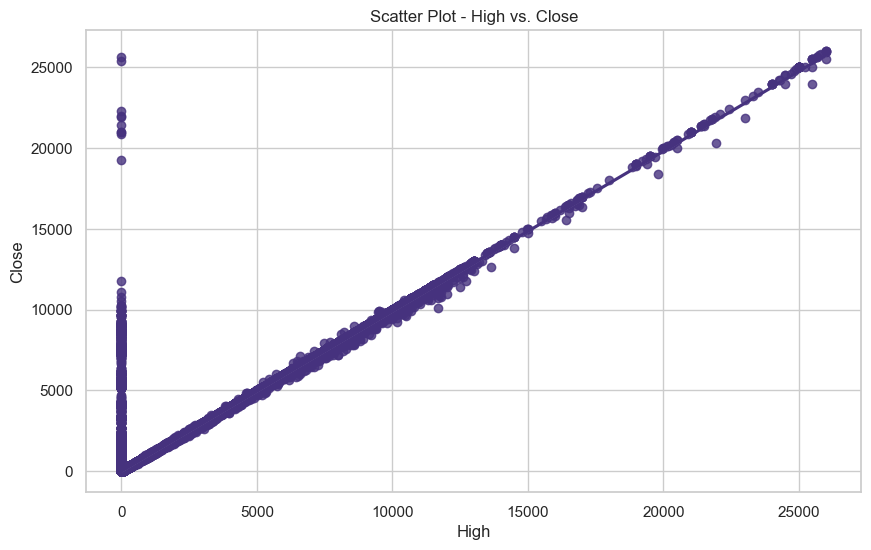

In [99]:
sns.set(style="whitegrid", palette="viridis")
plt.figure(figsize=(10, 6))
sns.regplot(x='High', y='Close', data=data)
plt.title('Scatter Plot - High vs. Close')
plt.xlabel('High')
plt.ylabel("Close")
plt.show()

## its very rare that high is 0 and close is high

In [100]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Sector', 'Company',
       'Year', 'month'],
      dtype='object')

In [101]:
# Merge the four DataFrames using inner join
merged_data = pd.merge(Open_from_1_to_100, Close_from_1_to_100, how='inner')
merged_data = pd.merge(merged_data, High_from_1_to_100, how='inner')
merged_data = pd.merge(merged_data, Low_from_1_to_100, how='inner')


In [102]:
merged_data

,Date,Open,High,Low,Close,Volume,Sector,Company,Year,month
0,2001-01-15,19.50,19.50,19.50,19.50,0.0,Agriculture,Good Luck Industries Ltd,2001,January
1,2001-05-15,19.50,27.00,27.00,27.00,500.0,Agriculture,Good Luck Industries Ltd,2001,May
2,2001-05-24,27.00,27.00,27.00,27.00,0.0,Agriculture,Good Luck Industries Ltd,2001,May
3,2001-12-15,25.00,25.00,25.00,25.00,0.0,Agriculture,Good Luck Industries Ltd,2001,December
4,2002-12-04,25.00,26.85,26.85,26.85,0.0,Agriculture,Good Luck Industries Ltd,2002,December
...,...,...,...,...,...,...,...,...,...,...
1303210,2021-11-15,11.80,11.89,11.11,11.26,2083500.0,Yarn & Fabrics & fibers,Service Fabrics Limited,2021,November
1303211,2021-11-16,11.50,12.20,11.48,12.06,9581500.0,Yarn & Fabrics & fibers,Service Fabrics Limited,2021,November
1303212,2021-11-17,12.25,12.79,11.80,11.94,18935000.0,Yarn & Fabrics & fibers,Service Fabrics Limited,2021,November
1303213,2021-11-18,12.48,12.94,12.15,12.87,17734000.0,Yarn & Fabrics & fibers,Service Fabrics Limited,2021,November


In [103]:
# Merge the four DataFrames using inner join
merged_data = pd.merge(Open_from_100_to_3000, Close_from_100_to_3000, how='inner')
merged_data = pd.merge(merged_data, High_from_100_to_3000, how='inner')
merged_data = pd.merge(merged_data, Low_from_100_to_3000, how='inner')


In [104]:
merged_data

,Date,Open,High,Low,Close,Volume,Sector,Company,Year,month
0,2004-04-30,105.0,110.00,110.0,110.00,0.0,Agriculture,Good Luck Industries Ltd,2004,April
1,2004-05-18,110.0,111.00,111.0,111.00,0.0,Agriculture,Good Luck Industries Ltd,2004,May
2,2004-05-24,111.0,112.00,112.0,112.00,0.0,Agriculture,Good Luck Industries Ltd,2004,May
3,2004-06-15,112.0,120.40,120.4,120.40,30000.0,Agriculture,Good Luck Industries Ltd,2004,June
4,2004-09-08,120.4,121.00,121.0,121.00,0.0,Agriculture,Good Luck Industries Ltd,2004,September
...,...,...,...,...,...,...,...,...,...,...
296890,2022-11-11,1157.0,1157.00,1157.0,1250.00,20.0,Yarn & Fabrics & fibers,Sapphire Fibres Limited,2022,November
296891,2022-11-15,1160.0,1250.00,1160.0,1160.00,2540.0,Yarn & Fabrics & fibers,Sapphire Fibres Limited,2022,November
296892,2022-11-16,1073.1,1073.10,1073.0,1073.00,380.0,Yarn & Fabrics & fibers,Sapphire Fibres Limited,2022,November
296893,2022-11-17,994.0,1153.47,994.0,1153.31,160.0,Yarn & Fabrics & fibers,Sapphire Fibres Limited,2022,November


In [105]:
correlation_matrix

,Open,High,Low,Close,Volume
Open,1.000000,0.978356,0.978929,0.937818,-0.018640
High,0.978356,1.000000,0.998423,0.958798,-0.018814
Low,0.978929,0.998423,1.000000,0.957534,-0.018892
Close,0.937818,0.958798,0.957534,1.000000,-0.019958
Volume,-0.018640,-0.018814,-0.018892,-0.019958,1.000000


## Date vs Close

In [106]:
data['Year'] = data['Date'].dt.year

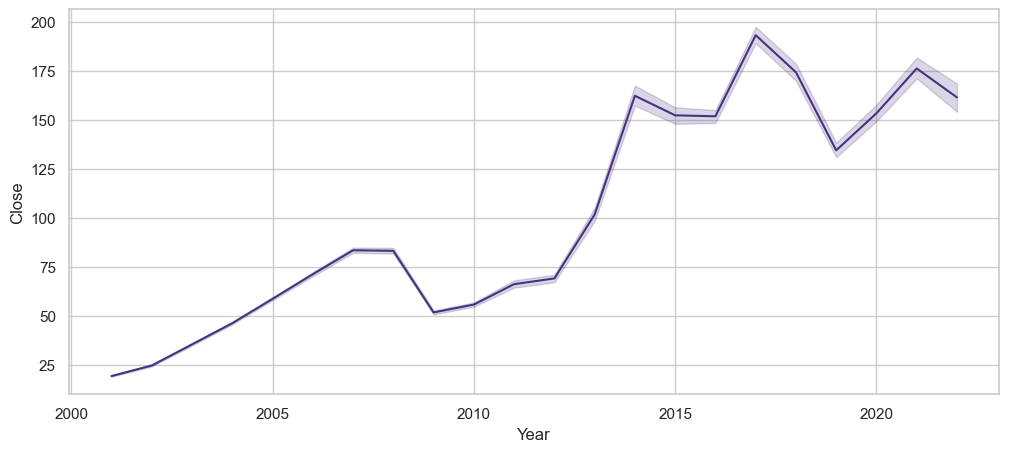

In [107]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
sns.lineplot(x='Year', y='Close', data=data, ax=ax)
plt.show()

In [108]:
data['month'] = data['Date'].dt.month_name()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'month' column to categorical type with the correct order
data['month'] = pd.Categorical(data['month'], categories=month_order, ordered=True)

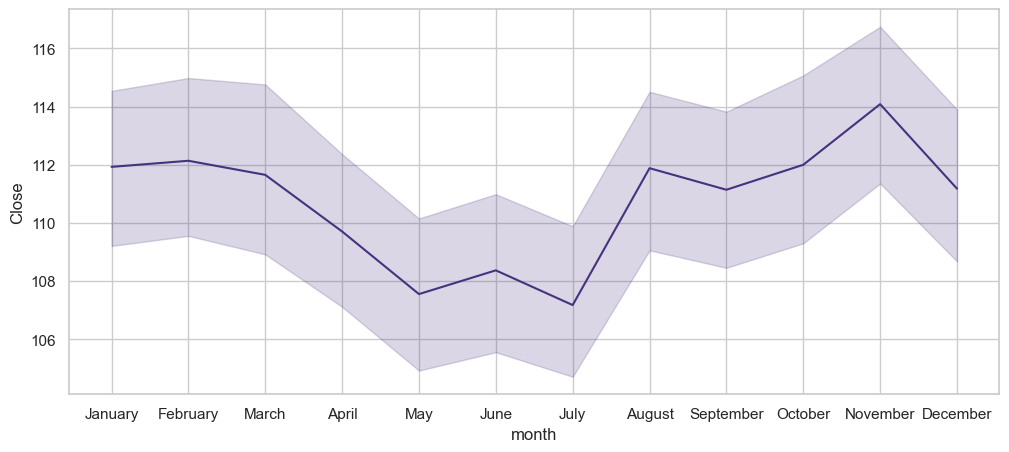

In [109]:

fig, ax = plt.subplots(1, 1, figsize=(12, 5))
sns.lineplot(x='month', y='Close', data=data, ax=ax)
plt.show()

In [110]:
data['Day'] = data['Date'].dt.day

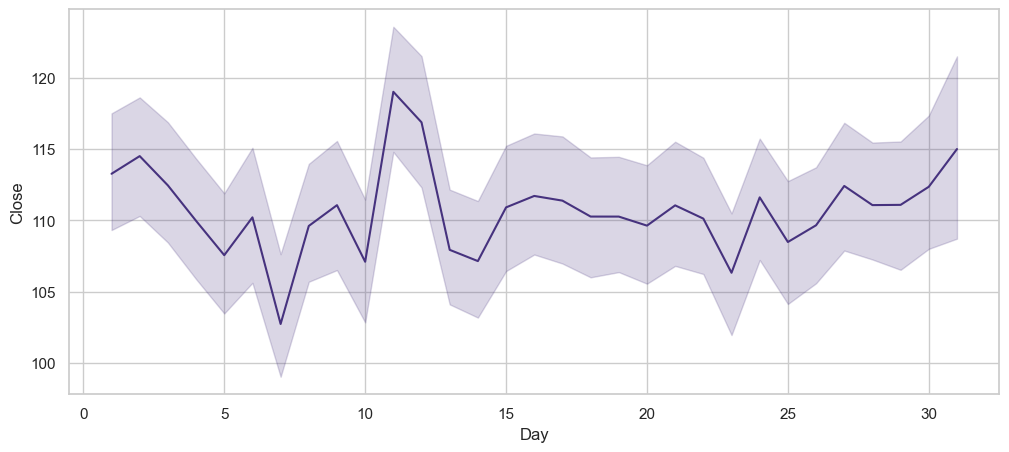

In [111]:

fig, ax = plt.subplots(1, 1, figsize=(12, 5))
sns.lineplot(x='Day', y='Close', data=data, ax=ax)
plt.show()

## Date vs Open

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
sns.lineplot(x='Year', y='Open', data=data, ax=ax)
plt.show()

In [ ]:

fig, ax = plt.subplots(1, 1, figsize=(12, 5))
sns.lineplot(x='month', y='Open', data=data, ax=ax)
plt.show()

In [ ]:

fig, ax = plt.subplots(1, 1, figsize=(12, 5))
sns.lineplot(x='Day', y='Open', data=data, ax=ax)
plt.show()

## Date vs High

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
sns.lineplot(x='Year', y='High', data=data, ax=ax)
plt.show()

In [ ]:

fig, ax = plt.subplots(1, 1, figsize=(12, 5))
sns.lineplot(x='month', y='High', data=data, ax=ax)
plt.show()

## Date vs Low

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
sns.lineplot(x='Year', y='Low', data=data, ax=ax)
plt.show()

In [ ]:

fig, ax = plt.subplots(1, 1, figsize=(12, 5))
sns.lineplot(x='month', y='Low', data=data, ax=ax)
plt.show()

## Date vs Volume

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
sns.lineplot(x='Year', y='Volume', data=data, ax=ax)
plt.show()

In [ ]:

fig, ax = plt.subplots(1, 1, figsize=(12, 5))
sns.lineplot(x='month', y='Volume', data=data, ax=ax)
plt.show()

### Volume ususally declines in last of the year in PSX but starts with highest peak in start of year

In [ ]:

fig, ax = plt.subplots(1, 1, figsize=(12, 5))
sns.lineplot(x='Day', y='Volume', data=data, ax=ax)
plt.show()

### Volumes goes up and down in start of week then constant in middle of month and high at the end of month

## Company vs Volume:

In [ ]:
sns.barplot(x='Company',y='Close',data=data)

In [ ]:
print(data.groupby('Company')['Volume'].sum())

In [ ]:
sum_volumes = data.groupby('Company')['Volume'].sum()

pd.options.display.float_format = '{:.2f}'.format

print(sum_volumes)

In [ ]:
print(f'highest volume is {sum_volumes.max()} of company {sum_volumes.idxmax()}')

In [ ]:
print(f'highest volume is {sum_volumes.min()} of company {sum_volumes.idxmin()}')

In [ ]:
max_volume_date = data.loc[data['Volume'].idxmax(), 'Date']
print(f'The highest volume for Company {sum_volumes.idxmax()} was on {max_volume_date}.')

In [ ]:
min_volume_date = data.loc[data['Volume'].idxmin(), 'Date']
print(f'The lowesr volume for Company {sum_volumes.idxmin()} was on {min_volume_date}.')

## Sector vs Volume

In [ ]:
plt.figure(figsize=(12, 6))

# Create the barplot
g = sns.barplot(x="Sector", y="Volume", data=data)

# Rotate x-axis labels
g.set_xticklabels(g.get_xticklabels(), rotation=90)

# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
volume_of_sectors=data.groupby('Sector')['Volume'].sum()

In [ ]:
print(f'Maximum Volume of a sector is {volume_of_sectors.max()} of {volume_of_sectors.idxmax()} sector')

In [ ]:
print(f'Minimum Volume of a sector is {volume_of_sectors.min()} of {volume_of_sectors.idxmin()} sector')

## Close vs Volume

In [ ]:
sns.set(style="whitegrid", palette="viridis")

# Create the plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Close', y='Volume', data=data)
plt.title('Scatter Plot - Close vs. Volume')
plt.xlabel('Close')
plt.ylabel('Volume')
plt.show()

#### Weak Relationship: The correlation coefficient of -0.02 is very close to 0, indicating a very weak linear relationship between the Close price and Volume. This means that changes in the closing price are not strongly associated with changes in trading volume.

No Predictive Power: For practical purposes, you should not rely on Close prices to predict Volume (or vice versa) based on this dataset.

## Sector vs Close

In [ ]:
plt.figure(figsize=(12, 6))

# Create the barplot
g = sns.barplot(x="Sector", y="Close", data=data)

# Rotate x-axis labels
g.set_xticklabels(g.get_xticklabels(), rotation=90)

# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
Close_of_sectors=data.groupby('Sector')['Close']

In [ ]:
Close_of_sectors.max()

In [ ]:
Close_of_sectors = data.groupby('Sector')['Close']
max_close_value = Close_of_sectors.max().max()  # Overall maximum close value
max_close_sector = Close_of_sectors.max().idxmax()  # Sector with overall maximum close value

print(f"The maximum closed value in 22 years was of sector '{max_close_sector}' which was {max_close_value}")


### most outperforming sector in context of closed index is foods sector

In [ ]:
data.sample(3)

In [ ]:
Close_of_sectors = data.groupby('Sector')['Close']
max_close_value = Close_of_sectors.max().max()  # Overall maximum close value
max_close_sector = Close_of_sectors.max().idxmax()  # Sector with overall maximum close value

print(f"The maximum closed value in 22 years was of sector '{max_close_sector}' which was {max_close_value}")


### Results fROM EDA:

-> 80% of data is in small range 19% is in high range causing skewness , outliers but this is natural as outperforming days in stocks are less

-> All the price features are highly correlated causing multicolinearity 

-> Volume has -0.02 or 0 corr with other features so in a multi collinear dataset it will provide some info

-> Price features all have same trend their graph is going up from 2001 to 2022 showing high prices in Pakistan

-> Volume of PSX companies with time is a hilly graph it was on peak in 2020 then falling down

## Feature Engineering:

In [6]:
data_balanced = data.copy()

### Handling zero values

In [7]:

rows_with_zero_prices = data_balanced[
    (data_balanced['Volume'] == 0) & 
    (data_balanced['High'] == 0) & 
    (data_balanced['Low'] == 0) & 
    (data_balanced['Close'] == 0) & 
    (data_balanced['Open'] == 0)
]

data_balanced = data_balanced.drop(rows_with_zero_prices.index)

print(data_balanced.shape)
print(data_balanced.head())


(1624941, 9)
        Date  Open   High    Low  Close  Volume       Sector  \
0 2001-01-15  19.5  19.50  19.50  19.50     0.0  Agriculture   
1 2001-05-15  19.5  27.00  27.00  27.00   500.0  Agriculture   
2 2001-05-24  27.0  27.00  27.00  27.00     0.0  Agriculture   
3 2001-12-15  25.0  25.00  25.00  25.00     0.0  Agriculture   
4 2002-12-04  25.0  26.85  26.85  26.85     0.0  Agriculture   

                    Company Standardized_Date  
0  Good Luck Industries Ltd        2001-01-15  
1  Good Luck Industries Ltd        2001-05-15  
2  Good Luck Industries Ltd        2001-05-24  
3  Good Luck Industries Ltd        2001-12-15  
4  Good Luck Industries Ltd        2002-12-04  


In [8]:

rows_with_zero_prices = data_balanced[
    (data_balanced['Volume'] == 0) & 
    (data_balanced['High'] == 0) & 
    (data_balanced['Low'] == 0) &  
    (data_balanced['Open'] == 0)
]
rows_with_zero_prices

,Date,Open,High,Low,Close,Volume,Sector,Company,Standardized_Date
84,2015-10-14,0.0,0.0,0.0,492.00,0.0,Agriculture,Good Luck Industries Ltd,2015-10-14
85,2015-10-19,0.0,0.0,0.0,492.00,0.0,Agriculture,Good Luck Industries Ltd,2015-10-19
86,2015-10-21,0.0,0.0,0.0,492.00,0.0,Agriculture,Good Luck Industries Ltd,2015-10-21
87,2015-10-22,0.0,0.0,0.0,492.00,0.0,Agriculture,Good Luck Industries Ltd,2015-10-22
88,2015-10-26,0.0,0.0,0.0,492.00,0.0,Agriculture,Good Luck Industries Ltd,2015-10-26
...,...,...,...,...,...,...,...,...,...
1623817,2016-05-13,0.0,0.0,0.0,18.91,0.0,Yarn & Fabrics & fibers,Service Fabrics Limited,2016-05-13
1623818,2016-05-16,0.0,0.0,0.0,18.91,0.0,Yarn & Fabrics & fibers,Service Fabrics Limited,2016-05-16
1623819,2016-05-17,0.0,0.0,0.0,18.91,0.0,Yarn & Fabrics & fibers,Service Fabrics Limited,2016-05-17
1623820,2016-05-18,0.0,0.0,0.0,18.91,0.0,Yarn & Fabrics & fibers,Service Fabrics Limited,2016-05-18


In [9]:
data_balanced = data_balanced.drop(rows_with_zero_prices.index)

print(data_balanced.shape)
print(data_balanced.head())

(1559794, 9)
        Date  Open   High    Low  Close  Volume       Sector  \
0 2001-01-15  19.5  19.50  19.50  19.50     0.0  Agriculture   
1 2001-05-15  19.5  27.00  27.00  27.00   500.0  Agriculture   
2 2001-05-24  27.0  27.00  27.00  27.00     0.0  Agriculture   
3 2001-12-15  25.0  25.00  25.00  25.00     0.0  Agriculture   
4 2002-12-04  25.0  26.85  26.85  26.85     0.0  Agriculture   

                    Company Standardized_Date  
0  Good Luck Industries Ltd        2001-01-15  
1  Good Luck Industries Ltd        2001-05-15  
2  Good Luck Industries Ltd        2001-05-24  
3  Good Luck Industries Ltd        2001-12-15  
4  Good Luck Industries Ltd        2002-12-04  


## Function: `zero_handler`

### Purpose
Handles zero values in a specified feature by:
1. Identifying natural zeros (valid zeros).
2. Identifying potential errors (invalid zeros).
3. Imputing potential errors with the median of non-zero values.

### Parameters
- `data_balanced`: DataFrame containing the data.
- `feature`: The feature (column) to process.

In [10]:
features = ['Open', 'Close', 'High', 'Low', 'Volume']
def zero_handler(data_balanced, feature):
    natural_zeros = data_balanced[
        (data_balanced[feature] == 0) & 
        (data_balanced[features].drop(columns=[feature]) <= 10).all(axis=1)
    ]
    
    potential_errors = data_balanced[
        (data_balanced[feature] == 0) & 
        (data_balanced[features].drop(columns=[feature]) > 10).any(axis=1)
    ] 
    data_without_potential_errors = data_balanced.drop(potential_errors.index)
    median_feature = np.median(data_without_potential_errors[feature])

    data_balanced.loc[potential_errors.index, feature] = median_feature
    return data_balanced


In [11]:
features = ['Open', 'Close', 'High', 'Low', 'Volume']
for feature in features:
    data_balanced = zero_handler(data_balanced,feature)

# Handling outliers

## Outlier Detection Function

### Purpose
The `outlier_detector` function identifies outliers in a given feature of a DataFrame using the Interquartile Range (IQR) method.

### Process
1. **Calculate Quartiles**:
   - Compute the first quartile (Q1) and third quartile (Q3) for the specified feature.
2. **Compute IQR**:
   - Calculate the Interquartile Range (IQR) as the difference between Q3 and Q1.
3. **Determine Limits**:
   - Set the upper limit as Q3 + 1.5 * IQR.
   - Set the lower limit as Q1 - 1.5 * IQR.
4. **Identify Outliers**:
   - Select data points where the feature values are outside the upper and lower limits.
5. **Output**:
   - Print the upper and lower limits, and the number of outliers.
   - Return the number of outliers and the outliers DataFrame.


In [12]:
def outlier_detector(data_balanced,feature):
    Q1 = data_balanced[feature].quantile(0.25)
    Q3 = data_balanced[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    outliers = data_balanced[(data_balanced[feature] > upper_limit) | (data_balanced[feature] <lower_limit)]
    print(f'outlier data of {feature}')
    print(f'Upper Limit: {upper_limit}')
    print(f'Lower Limit: {lower_limit}')
    print(f'Number of Outliers: {feature,len(outliers)}')
    return len(outliers), outliers

In [13]:
outliers_count_dict = {}
outliers_dict = {}

for feature in features:
    outlier_count, outliers = outlier_detector(data_balanced, feature)
    outliers_count_dict[f'{feature}_outlier_count'] = outlier_count
    outliers_dict[f'{feature}_outliers'] = outliers

# Display the number of outliers for each feature
for key, value in outliers_count_dict.items():
    print(f'{key}: {value}')

# Optionally display the actual outliers DataFrame for each feature
for key, value in outliers_dict.items():
    print(f'\n{key}:\n{value}\n')

outlier data of Open
Upper Limit: 169.5
Lower Limit: -90.5
Number of Outliers: ('Open', 196338)
outlier data of Close
Upper Limit: 172.3
Lower Limit: -92.18
Number of Outliers: ('Close', 195243)
outlier data of High
Upper Limit: 174.29
Lower Limit: -93.14999999999999
Number of Outliers: ('High', 195766)
outlier data of Low
Upper Limit: 169.72500000000002
Lower Limit: -90.87500000000001
Number of Outliers: ('Low', 195702)
outlier data of Volume
Upper Limit: 392000.0
Lower Limit: -232000.0
Number of Outliers: ('Volume', 275575)
Open_outlier_count: 196338
Close_outlier_count: 195243
High_outlier_count: 195766
Low_outlier_count: 195702
Volume_outlier_count: 275575

Open_outliers:
              Date     Open     High     Low    Close   Volume  \
51      2005-04-18   174.15   186.00   186.0   186.00  14800.0   
52      2005-04-19   186.00   188.00   188.0   188.00  14800.0   
53      2005-04-27   188.00   191.00   191.0   191.00  14800.0   
54      2005-02-05   191.00   192.00   192.0   192.

In [14]:
outliers_count_dict

{'Open_outlier_count': 196338,
 'Close_outlier_count': 195243,
 'High_outlier_count': 195766,
 'Low_outlier_count': 195702,
 'Volume_outlier_count': 275575}

### showing us the number of outliers

In [15]:
Open_outliers= outliers_dict['Open_outliers']
Close_outliers= outliers_dict['Close_outliers']
High_outliers= outliers_dict['High_outliers']
Low_outliers= outliers_dict['Low_outliers']
Volume_outliers= outliers_dict['Volume_outliers']

#### Each of above is a dataframe containing outliers of respective feature Lets merge them and find common outliers

In [16]:
dataaa = data_balanced.copy()

## dropping outliers

In [17]:
_, Open_outliers = outlier_detector(dataaa, 'Open')
_, Close_outliers = outlier_detector(dataaa, 'Close')
_, High_outliers = outlier_detector(dataaa, 'High')
_, Low_outliers = outlier_detector(dataaa, 'Low')
_, Volume_outliers = outlier_detector(dataaa, 'Volume')

# Merge outliers
merged_outliers = pd.concat([Open_outliers, Close_outliers, High_outliers, Low_outliers, Volume_outliers], axis=1, join='inner')

print("Merged outliers:\n", merged_outliers)

outlier data of Open
Upper Limit: 169.5
Lower Limit: -90.5
Number of Outliers: ('Open', 196338)
outlier data of Close
Upper Limit: 172.3
Lower Limit: -92.18
Number of Outliers: ('Close', 195243)
outlier data of High
Upper Limit: 174.29
Lower Limit: -93.14999999999999
Number of Outliers: ('High', 195766)
outlier data of Low
Upper Limit: 169.72500000000002
Lower Limit: -90.87500000000001
Number of Outliers: ('Low', 195702)
outlier data of Volume
Upper Limit: 392000.0
Lower Limit: -232000.0
Number of Outliers: ('Volume', 275575)
Merged outliers:
               Date    Open    High     Low   Close    Volume      Sector  \
10159   2016-07-28  213.63  219.40  212.00  217.92  418800.0  Automobile   
10476   2017-12-22  315.00  330.75  315.00  330.75  747300.0  Automobile   
10975   2020-04-06  184.00  190.00  183.00  189.45  508100.0  Automobile   
10988   2020-06-23  185.50  190.50  185.50  189.07  451200.0  Automobile   
11133   2021-03-02  244.00  256.51  236.00  247.46  472400.0  Automobi

In [18]:
dataaa = dataaa.drop(merged_outliers.index)

In [19]:
_, Open_outliers = outlier_detector(dataaa, 'Open')

outlier data of Open
Upper Limit: 159.65
Lower Limit: -84.75
Number of Outliers: ('Open', 182949)


In [20]:
dataaa = dataaa.drop(Open_outliers.index)

In [21]:

_, High_outliers = outlier_detector(dataaa, 'High')

outlier data of High
Upper Limit: 100.22000000000001
Lower Limit: -50.500000000000014
Number of Outliers: ('High', 102270)


In [22]:
dataaa = dataaa.drop(High_outliers.index)

In [23]:
_, Low_outliers = outlier_detector(dataaa, 'Low')

outlier data of Low
Upper Limit: 76.0
Lower Limit: -37.199999999999996
Number of Outliers: ('Low', 64197)


In [24]:
dataaa = dataaa.drop(Low_outliers.index)

In [25]:

_, Close_outliers = outlier_detector(dataaa, 'Close')

outlier data of Close
Upper Limit: 65.82499999999999
Lower Limit: -31.414999999999996
Number of Outliers: ('Close', 48321)


In [26]:
# Drop rows from dataaa where indices match Close_outliers
dataaa = dataaa.drop(Close_outliers.index)

In [27]:
_, Volume_outliers = outlier_detector(dataaa, 'Volume')

outlier data of Volume
Upper Limit: 408750.0
Lower Limit: -241250.0
Number of Outliers: ('Volume', 199294)


In [28]:
# Drop rows from dataaa where indices match Volume_outliers
dataaa = dataaa.drop(Volume_outliers.index)

##### just checking now any outliers by calling our outlier_detector

In [93]:
dataaa.shape

(937341, 9)

In [29]:
def outlier_detector(dataaa, feature):
    Q1 = dataaa[feature].quantile(0.25)
    Q3 = dataaa[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    
    outliers = dataaa[(dataaa[feature] > upper_limit) | (dataaa[feature] < lower_limit)]
    
    print(f'Outlier data of {feature}')
    print(f'Upper Limit: {upper_limit}')
    print(f'Lower Limit: {lower_limit}')
    print(f'Number of Outliers: {len(outliers)}')
    
    return len(outliers), outliers

In [36]:
for feature in features:
    outlier_detector(dataaa,feature)

Outlier data of Open
Upper Limit: 57.0
Lower Limit: -27.0
Number of Outliers: 0
Outlier data of Close
Upper Limit: 57.77499999999999
Lower Limit: -27.464999999999996
Number of Outliers: 0
Outlier data of High
Upper Limit: 58.099999999999994
Lower Limit: -27.499999999999993
Number of Outliers: 0
Outlier data of Low
Upper Limit: 57.169999999999995
Lower Limit: -27.309999999999995
Number of Outliers: 0
Outlier data of Volume
Upper Limit: 105250.0
Lower Limit: -60750.0
Number of Outliers: 0


### capping remaining outliers

In [31]:
def outlier_capper(dataaa,feature):
    Q1 = dataaa[feature].quantile(0.25)
    Q3 = dataaa[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    dataaa.loc[dataaa[feature] > upper_limit, feature] = np.random.randint(upper_limit-10,upper_limit,size=len(dataaa.loc[dataaa[feature] > upper_limit, feature]))
    dataaa.loc[dataaa[feature] < lower_limit, feature] = np.random.randint(lower_limit, lower_limit + 10, size=len(dataaa.loc[dataaa[feature] < lower_limit, feature]))
    return dataaa

In [32]:
for feature in features:
    outlier_capper(dataaa,feature)

In [37]:
dataaa['Close'].skew()

1.032013730160904

<Axes: xlabel='High', ylabel='Count'>

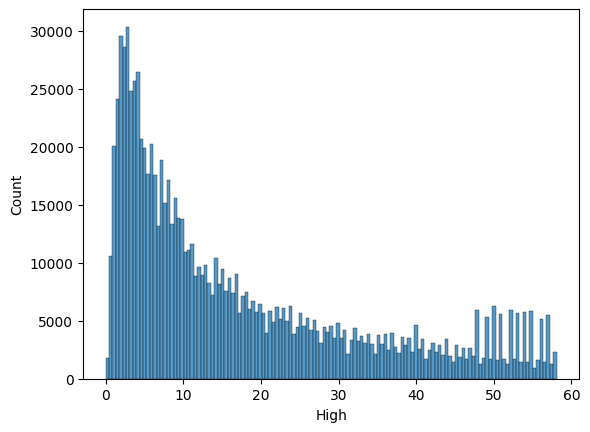

In [39]:
sns.histplot(dataaa['High'])

In [43]:
data_balanced['Close'].skew()

1.032013730160904

In [42]:
data_balanced = dataaa

## Feature construction:

##### 1- Price Range: Represents the difference between the highest and lowest prices during a given period, providing insight into the price volatility within each period.

In [44]:
data_balanced['Price_Range'] = data_balanced['High'] - data_balanced['Low']

##### 2- Average Price: Calculates the average price (mean of Open, High, Low, and Close) for each data point, offering a smoothed representation of price movements over time.
# Average Price

In [45]:
data_balanced['Avg_Price'] = (data_balanced['Open'] + data_balanced['High'] + data_balanced['Low'] + data_balanced['Close']) / 4

##### 3-Daily Change: Measures the change in the closing price from the opening price of each trading day, indicating the direction and magnitude of daily price movements.

In [46]:
data_balanced['Daily_Change'] =data_balanced['Close'] - data_balanced['Open']

##### 4- Weekly Change: Quantifies the change in closing prices compared to the closing prices of the previous week, helping identify weekly trends and momentum.

In [47]:
data_balanced = data_balanced.sort_values(by=['Company', 'Date'])
data_balanced['Weekly_Change'] = data_balanced['Close'].diff(periods=7)

##### 5-Yearly Change: Calculates the difference in closing prices compared to the closing prices of the same day in the previous year, providing insights into longer-term trends and seasonality.

In [48]:
data_balanced['Yearly_Change'] = data_balanced['Close'].diff(periods=365)

##### 6- Volatility: Captures the degree of variation in price returns over a specific period, reflecting the market's uncertainty or risk associated with price movements.

In [49]:
data_balanced['Volatility'] = data_balanced['Close'].pct_change().rolling(window=20).std()

##### 7- Exponential Moving Average (EMA): Smooths out price data by giving more weight to recent prices, providing a trend-following indicator that reacts quickly to price changes.

In [50]:
ema_window = 20
sma_window = 50
data_balanced['EMA'] = data_balanced['Close'].ewm(span=ema_window, min_periods=ema_window, adjust=False).mean()

##### 8- Simple Moving Average (SMA): Provides a smoothed representation of price data by averaging closing prices over a specified period, helping identify trends and potential reversal points.

In [51]:
data_balanced['SMA'] = data_balanced['Close'].rolling(window=sma_window).mean()
data_balanced.isnull().sum()

Date                   0
Open                   0
High                   0
Low                    0
Close                  0
Volume                 0
Sector                 0
Company                0
Standardized_Date      0
Price_Range            0
Avg_Price              0
Daily_Change           0
Weekly_Change          7
Yearly_Change        365
Volatility            20
EMA                   19
SMA                   49
dtype: int64

In [52]:
# Separate numeric and categorical columns
numeric_features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Price_Range', 'Avg_Price', 'Daily_Change', 'Weekly_Change', 'Yearly_Change', 'Volatility', 'EMA', 'SMA']
categorical_features = ['Sector', 'Company']

# Fill missing values in numeric columns with 0
data_balanced[numeric_features] = data_balanced[numeric_features].fillna(0)

# Fill missing values in categorical columns with the mode
for col in categorical_features:
    data_balanced[col] = data_balanced[col].fillna(data_balanced[col].mode()[0])

# Check if there are any missing values left
print(data_balanced.isnull().sum())

Date                 0
Open                 0
High                 0
Low                  0
Close                0
Volume               0
Sector               0
Company              0
Standardized_Date    0
Price_Range          0
Avg_Price            0
Daily_Change         0
Weekly_Change        0
Yearly_Change        0
Volatility           0
EMA                  0
SMA                  0
dtype: int64


In [54]:
data_balanced.sample()

,Date,Open,High,Low,Close,Volume,Sector,Company,Standardized_Date,Price_Range,Avg_Price,Daily_Change,Weekly_Change,Yearly_Change,Volatility,EMA,SMA
193897,2011-04-26,6.54,6.55,6.31,6.5,33362.0,Bank,Soneri Bank Limited,2011-04-26,0.24,6.475,-0.04,0.39,-5.09,0.119456,6.194869,6.0438


In [55]:
data_balanced.drop(columns=['Sector','Company'],inplace=True)

In [74]:
data_balanced.sample()

,Date,Open,High,Low,Close,Volume,Standardized_Date,Price_Range,Avg_Price,Daily_Change,Weekly_Change,Yearly_Change,Volatility,EMA,SMA
662251,2002-06-18,19.65,19.9,19.15,19.25,30500.0,2002-06-18,0.75,19.4875,-0.4,1.55,-92.59,0.055435,20.398466,19.401


In [50]:
data_balanced.drop(['Sector','Company'],axis=1,inplace=True)

In [56]:
data_balanced.drop(['Date'],axis=1,inplace=True)

In [60]:
data_balanced.drop(['Standardized_Date'],axis=1,inplace=True)

In [61]:
y = data_balanced['Close']
x = data_balanced.drop(['Close'],axis=1)

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [65]:
x_train.sample(2)

,Open,High,Low,Volume,Price_Range,Avg_Price,Daily_Change,Weekly_Change,Yearly_Change,Volatility,EMA,SMA
916817,11.40,11.30,11.00,59000.0,0.3,11.175,-0.40,3.90,6.65,0.186685,7.648157,7.3370
196953,24.21,24.27,23.97,74700.0,0.3,24.105,-0.24,-0.86,21.94,0.271068,25.540465,28.7614


In [66]:
x_train[x_train<0].sum()

Open                   0.00
High                   0.00
Low                    0.00
Volume                 0.00
Price_Range       -38128.04
Avg_Price              0.00
Daily_Change     -207428.97
Weekly_Change    -955384.29
Yearly_Change   -3690535.22
Volatility             0.00
EMA                    0.00
SMA                    0.00
dtype: float64

## feature transformations

In [67]:


# Sample numeric features list
numeric_features = ['Open', 'High', 'Low', 'Volume', 'Price_Range', 'Avg_Price', 'Daily_Change', 'Weekly_Change', 'Yearly_Change', 'Volatility', 'EMA', 'SMA']

## Power transformer
log_trans = ColumnTransformer(
    transformers=[
        ('log', PowerTransformer(method='yeo-johnson', standardize=False), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
    ]
)
## robust scaler for outliers
robust = ColumnTransformer(
    transformers=[
        ('robust', RobustScaler(), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
    ]
)
## srandard scaler
standard = ColumnTransformer(
    transformers=[
        ('standard', StandardScaler(), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
    ]
)

# Apply transformations sequentially
x_train_transformed = log_trans.fit_transform(x_train)
x_train_transformed = robust.fit_transform(x_train_transformed)
x_train_transformed = standard.fit_transform(x_train_transformed)

PCA DataFrame:
             High  Weekly_Change
0      -0.808359      -0.477466
1      -1.375647       0.384100
2       0.009320       1.283834
3      -1.322739       0.036107
4       2.940837      -4.381163
...          ...            ...
749867  4.350181       0.066641
749868 -0.495123       0.814610
749869  2.362903       0.248499
749870 -0.473209      -0.260546
749871  4.177283      -0.875579

[749872 rows x 2 columns]

PCA Feature Names:
 ['High', 'Weekly_Change']


In [96]:
x_test_transformed = log_trans.fit_transform(x_test)
x_test_transformed = robust.fit_transform(x_test_transformed)
x_test_transformed = standard.fit_transform(x_test_transformed)

In [113]:
x_train_transformed = pd.DataFrame(x_train_transformed,columns=numeric_features)

### feature selection:

In [105]:
pca = PCA()
X_pca = pca.fit_transform(x_train_transformed)

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components to explain at least 95% variance
n_components = np.where(cumulative_variance >= 0.95)[0][0] + 1

print(f"Number of components to explain at least 95% of the variance: {n_components}")

Number of components to explain at least 95% of the variance: 7


#### so we will select first 7 principal compoments

In [114]:
# Apply PCAssssssssssss
pca = PCA(n_components=7)
x_train_pca = pca.fit_transform(x_train_transformed)


In [116]:
# Get the feature names for the principal components based on the loadings
components_df = pd.DataFrame(pca.components_, columns=numeric_features)
top_features = components_df.abs().idxmax(axis=1).tolist()

# Create a DataFrame with the PCA components using the original feature names
pca_df = pd.DataFrame(data=x_train_pca, columns=top_features)

# Display the PCA DataFrame and the PCA feature names
print("PCA DataFrame:\n", pca_df)
print("\nPCA Feature Names:\n", top_features)

PCA DataFrame:
             High  Weekly_Change    Volume  Daily_Change  Price_Range  \
0      -0.808359      -0.477466  1.118808     -0.313956     0.162736   
1      -1.375647       0.384100 -1.231534      0.566281    -0.498796   
2       0.009320       1.283834  2.649266      0.699306     0.266589   
3      -1.322739       0.036107 -0.783656     -0.743848    -0.248159   
4       2.940837      -4.381163  4.911539      2.723131    -6.841032   
...          ...            ...       ...           ...          ...   
749867  4.350181       0.066641  0.016324      0.110862     0.174257   
749868 -0.495123       0.814610 -1.227189      1.048369    -1.110483   
749869  2.362903       0.248499 -0.272565      0.403587     0.715388   
749870 -0.473209      -0.260546  0.867993     -0.290793     0.119496   
749871  4.177283      -0.875579  1.412830      0.437686     0.282810   

        Yearly_Change  Yearly_Change  
0            0.151769      -0.240426  
1            0.262175       0.480364  
2 

In [121]:
## doing same for x_test_transformed
x_test_pca = pca.fit_transform(x_test_transformed)

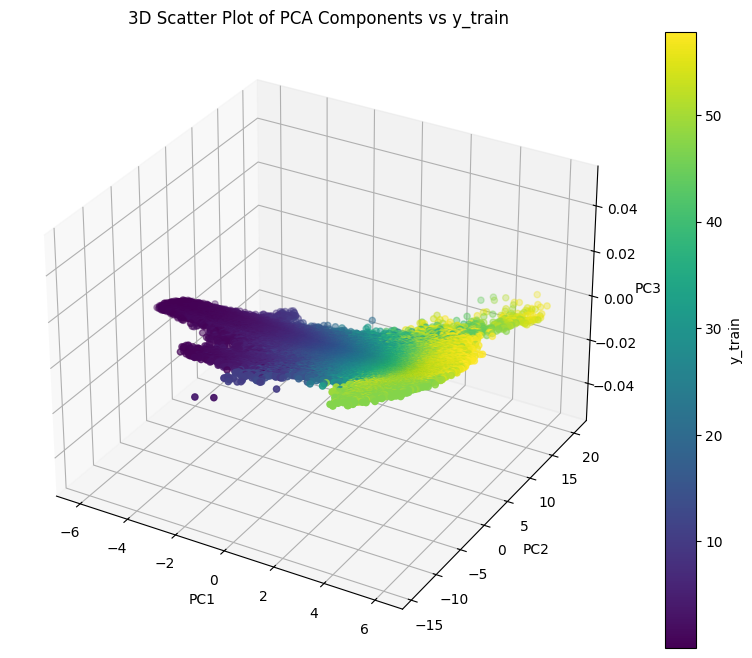

In [117]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(pca_df['High'], pca_df['Weekly_Change'], c=y_train, cmap='viridis')

# Labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Scatter Plot of PCA Components vs y_train')

# Colorbar
cbar = plt.colorbar(ax.collections[0], ax=ax, orientation='vertical')
cbar.set_label('y_train')

plt.show()

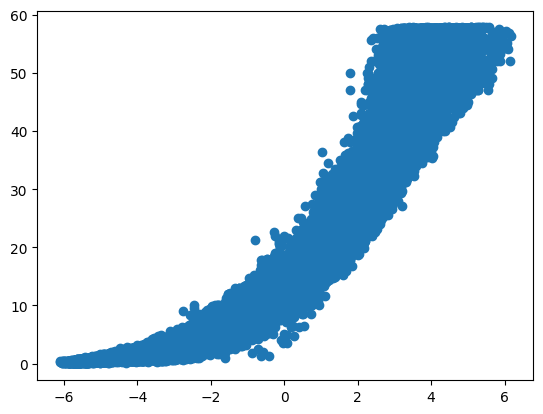

In [118]:
plt.scatter(pca_df['High'],y_train)

### Polynomial regression will be a good fit for such data but lets try differnt models and do model selection depending upon r2 score

##### Ridge Regression OLS & SGD

In [119]:
param_grid = {'alpha': np.logspace(-4, 4, 50)}

ridge = Ridge()

# Set up GridSearchCV to search for the best alpha
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='r2')

# Fit GridSearchCV
grid_search.fit(pca_df, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print(f"The best alpha value is: {best_alpha}")

The best alpha value is: 35.564803062231285


In [148]:
# Train Ridge regression with the best alpha value
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(pca_df, y_train)

y_pred_ridge1 = best_ridge.predict(x_test_pca)

mse = mean_squared_error(y_test, y_pred_ridge1)
r2 = r2_score(y_test, y_pred_ridge1)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 28.000085951824886
R2 Score: 0.8849420112358031


C:\Users\RIZWAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


#### Ridge regression through gradient descent

In [125]:

best_sgd_regressor = SGDRegressor(alpha=best_alpha, penalty='l2', max_iter=1000, tol=1e-3, random_state=42)
best_sgd_regressor.fit(pca_df, y_train)
y_pred_sgd = best_sgd_regressor.predict(x_test_pca)

# Calculate metrics
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

print("Ridge Regression using SGDRegressor with GridSearchCV:")
print(f"Mean Squared Error: {mse_sgd}")
print(f"R2 Score: {r2_sgd}")

Ridge Regression using SGDRegressor with GridSearchCV:
Mean Squared Error: 189.54360430461378
R2 Score: 0.22112718039766244


C:\Users\RIZWAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


### Lasso regression via OLS and gradient descent

In [129]:

param_grid_lasso = {
    'alpha': np.logspace(-4, 4, 50)
}

lasso = Lasso()
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid_lasso, cv=5, scoring='r2')

grid_search_lasso.fit(pca_df, y_train)

# Get the best alpha value
best_alpha_lasso = grid_search_lasso.best_params_['alpha']
print(f"The best alpha value for Lasso regression (OLS) is: {best_alpha_lasso}")

best_lasso = Lasso(alpha=best_alpha_lasso)
best_lasso.fit(pca_df, y_train)

y_pred_lasso_ols = best_lasso.predict(x_test_pca)

# Calculate metrics
mse_lasso_ols = mean_squared_error(y_test, y_pred_lasso_ols)
r2_lasso_ols = r2_score(y_test, y_pred_lasso_ols)

print("Lasso Regression using OLS:")
print(f"Mean Squared Error: {mse_lasso_ols}")
print(f"R2 Score: {r2_lasso_ols}")


The best alpha value for Lasso regression (OLS) is: 0.0001
Lasso Regression using OLS:
Mean Squared Error: 28.000028310700884
R2 Score: 0.8849422480947831


C:\Users\RIZWAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [130]:

sgd_lasso = SGDRegressor(penalty='l1', alpha=best_alpha_lasso, max_iter=1000, tol=1e-3, random_state=42)
sgd_lasso.fit(pca_df, y_train)
y_pred_sgd_lasso = sgd_lasso.predict(x_test_pca)

mse_sgd_lasso = mean_squared_error(y_test, y_pred_sgd_lasso)
r2_sgd_lasso = r2_score(y_test, y_pred_sgd_lasso)

print("Lasso Regression using SGDRegressor:")
print(f"Mean Squared Error: {mse_sgd_lasso}")
print(f"R2 Score: {r2_sgd_lasso}")


Lasso Regression using SGDRegressor:
Mean Squared Error: 28.03731622918743
R2 Score: 0.884789024532768


C:\Users\RIZWAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


### Polynomial Regression

In [162]:
poly = PolynomialFeatures(degree=2,include_bias=True)
pca_df_poly = poly.fit_transform(pca_df)
x_test_poly = poly.transform(x_test_pca)

C:\Users\RIZWAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [165]:
poly = PolynomialFeatures(degree=2, include_bias=True)
pca_df_poly = poly.fit_transform(pca_df)
x_test_poly = poly.transform(x_test_pca)
lr = LinearRegression()
lr.fit(pca_df_poly, y_train)  
y_pred_poly = lr.predict(x_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print("Polynomial Regression using OLS:")
print(f"Mean Squared Error: {mse_poly}")
print(f"R2 Score: {r2_poly}")


C:\Users\RIZWAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Polynomial Regression using OLS:
Mean Squared Error: 3.021201473596456
R2 Score: 0.987585275066601


In [167]:
lr = Ridge(alpha=0.0001)
lr.fit(pca_df_poly, y_train)  
y_pred_poly = lr.predict(x_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print("Polynomial Regression using OLS:")
print(f"Mean Squared Error: {mse_poly}")
print(f"R2 Score: {r2_poly}")


Polynomial Regression using OLS:
Mean Squared Error: 3.02120147325572
R2 Score: 0.9875852750680011


In [171]:
lr = Lasso()
lr.fit(pca_df_poly, y_train)  
y_pred_poly = lr.predict(x_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print("Polynomial Regression using OLS:")
print(f"Mean Squared Error: {mse_poly}")
print(f"R2 Score: {r2_poly}")

cv_scores = cross_val_score(lr, pca_df_poly, y_train, cv=5, scoring='r2')
print(f"Cross-validation R2 scores: {cv_scores}")
print(f"Mean Cross-validation R2 score: {np.mean(cv_scores)}")


Polynomial Regression using OLS:
Mean Squared Error: 4.255667066993172
R2 Score: 0.9825126074819656
Cross-validation R2 scores: [0.9825131  0.9824553  0.98239065 0.982398   0.98235153]
Mean Cross-validation R2 score: 0.9824217142101601


### so we will use poly model with lasso regression

In [169]:
from sklearn.model_selection import 
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming pca_df, x_test_pca, y_train, and y_test are defined correctly

# Transform training data with PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=True)
pca_df_poly = poly.fit_transform(pca_df)

# Transform test data with PolynomialFeatures
x_test_poly = poly.transform(x_test_pca)

# Fit the Lasso model
lr = Lasso()
lr.fit(pca_df_poly, y_train)

# Predict on transformed test data
y_pred_poly = lr.predict(x_test_poly)

# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression using Lasso:")
print(f"Mean Squared Error: {mse_poly}")
print(f"R2 Score: {r2_poly}")

# Perform cross-validation
cv_scores = cross_val_score(lr, pca_df_poly, y_train, cv=5, scoring='r2')
print(f"Cross-validation R2 scores: {cv_scores}")
print(f"Mean Cross-validation R2 score: {np.mean(cv_scores)}")

C:\Users\RIZWAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Polynomial Regression using Lasso:
Mean Squared Error: 4.255667066993172
R2 Score: 0.9825126074819656
Cross-validation R2 scores: [0.9825131  0.9824553  0.98239065 0.982398   0.98235153]
Mean Cross-validation R2 score: 0.9824217142101601
